# Employee Satisfaction and Outflow Prediction

In this project, we aim to predict employee satisfaction rate and forecast whether an employee will quit the company in the near future. To achieve this, we will utilize two machine learning models. 

**Our goal:** Provide predictive models for the HR department that will forecast satisfaction rate and assist in making decisions regarding the necessity of preventive measures to reduce employee outflow.

**Data overview:** 
* id — unique identifier of the employee;
* dept — department where the employee works;
* level — employee's level (junior, middle, senior);
* workload — employee's workload (low, medium, high);
* employment_years — duration of employment at the company;
* last_year_promo — indicates whether there was a promotion last year;
* last_year_violations — indicates whether the employee violated the employment contract last year;
* supervisor_evaluation — supervisor's evaluation of the employee's job performance;
* salary — monthly salary of the employee;
* job_satisfaction_rate — employee's job satisfaction rate, target feature for task 1;
* quit — indicates whether the employee quit the job, target feature for task 2.

**Research plan:**

1. Data loading and overview.
0. Data preprocessing.
0. Exploratory data analysis.
0. Profile of a typical resigned employee.
0. Machine learning model for Job Satisfaction Rate prediction.
0. Hypothesis testing on the relationship between the satisfaction rate and employee outflow.
0. Machine learning model for employee outflow prediction.
0. Research conclusions.

## 1. Data loading and overview

At this stage, we import the libraries necessary for the research, familiarize ourselves with the data and its format, make superficial conclusions about the data problems that we will need to fix during the preprocessing stage.

In [1]:
# Install/update libraries
!pip install -q phik
!pip install -U -q scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import math
import phik
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler)

from sklearn.compose import ColumnTransformer

from sklearn.metrics import  make_scorer, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import (SelectKBest,
                                       f_classif,
                                       mutual_info_classif)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from IPython.display import display

%config InlineBackend.figure_format = 'retina'

RANDOM_STATE = 42

In [2]:
# Load training set for Job Satisfaction Rate
X_jsr = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv', index_col='id')
display(X_jsr.head())
X_jsr.info()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


In [3]:
# Load training set for Outflow
X_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv', index_col='id')
display(X_quit.head())
X_quit.info()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


In [4]:
# Load testing set
X_test = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv', index_col='id')
display(X_test.head())
X_test.info()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


In [5]:
# Load testing target feature for Job Satisfaction Rate
y_test_jsr = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv', index_col='id')
display(y_test_jsr.head())
y_test_jsr.info()

,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


In [6]:
# Load testing target feature for Outflow
y_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv', index_col='id')
display(y_test_quit.head())
y_test_quit.info()

,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


### Summary

* The training datasets contain data on 4000 employees.
* All parameters correspond to the provided data description.
* Missing data has been detected.
* There may be implicit duplicates in columns with string type.
* Column names follow snake_case convention, no renaming is required.
* The order of indices in `X_test`, `y_test_jsr`, and `y_test_quit` does not match; sorting and merging by index is needed.

## 2. Data preprocessing

At this stage, we clean the data, make it more suitable for research by addressing issues such as:
* incorrect column names;
* duplicates (explicit and implicit);
* missing data;
* incorrect data format in cells;
* incorrect data.

Typically, this step also involves filling missing values, but we will automate this action in the pipeline by filling missind values with a mode, since missing values occur in categorical features.

Let's look at the target feature `quit`.

In [7]:
X_quit['quit'].value_counts(dropna=False)

quit
no     2872
yes    1128
Name: count, dtype: int64

The target feature `quit` is categorical and has only two unique values. Therefore, we are solving a binary classification problem. Additionally, we observe class imbalance.

Let's look at the other categorical features.

In [8]:
dfs = {'X_jsr': X_jsr, 'X_quit': X_quit, 'X_test': X_test}

# Function that iterates through each dataframe and print value counts
def print_value_counts(column):
    for name, df in dfs.items():
        print(name)
        print(df[column].value_counts(dropna=False))
        print()

In [9]:
print_value_counts(column='last_year_promo')

X_jsr
last_year_promo
no     3880
yes     120
Name: count, dtype: int64

X_quit
last_year_promo
no     3887
yes     113
Name: count, dtype: int64

X_test
last_year_promo
no     1937
yes      63
Name: count, dtype: int64



In [10]:
print_value_counts(column='last_year_violations')

X_jsr
last_year_violations
no     3441
yes     559
Name: count, dtype: int64

X_quit
last_year_violations
no     3455
yes     545
Name: count, dtype: int64

X_test
last_year_violations
no     1738
yes     262
Name: count, dtype: int64



No errors were found in the binary categorical columns. During the pipeline design stage, we will encode them.

In [11]:
print_value_counts(column='dept')

X_jsr
dept
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
NaN              6
Name: count, dtype: int64

X_quit
dept
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: count, dtype: int64

X_test
dept
sales         763
technology    455
marketing     279
purchasing    273
hr            227
NaN             2
                1
Name: count, dtype: int64



In [12]:
# Replace empty value with NaN
X_test.loc[~X_test['dept'].isin(['sales','technology','marketing','purchasing','hr',np.nan]),'dept'] = np.nan

In [13]:
print_value_counts(column='level')

X_jsr
level
junior    1894
middle    1744
sinior     358
NaN          4
Name: count, dtype: int64

X_quit
level
junior    1949
middle    1694
sinior     357
Name: count, dtype: int64

X_test
level
junior    974
middle    854
sinior    171
NaN         1
Name: count, dtype: int64



In [14]:
# Correct the typos
for df in dfs.values():
    df['level'] = df['level'].replace('sinior', 'senior')

In [15]:
print_value_counts(column='workload')

X_jsr
workload
medium    2066
low       1200
high       734
Name: count, dtype: int64

X_quit
workload
medium    2118
low       1208
high       674
Name: count, dtype: int64

X_test
workload
medium    1043
low        593
high       363
             1
Name: count, dtype: int64



In [16]:
# Replace empty value with NaN
X_test.loc[~X_test['workload'].isin(['medium','low','high']),'workload'] = np.nan

We have checked the columns for implicit duplicates, now let's check training data for explicit duplicates.

In [17]:
# Check explicit duplicates (identical rows)
print('Identical rows in X_jsr', X_jsr.duplicated().sum())
print('Identical rows in X_quit', X_quit.duplicated().sum())

Identical rows in X_jsr 245
Identical rows in X_quit 1413


Employees may have the same characteristics. For now, we will not remove explicit duplicates and will conduct an exploratory analysis on current data. We will remove these duplicates before training the machine learning models.

In [18]:
# Merge X_test, y_test_jsr, y_test_quit
test_data = X_test.merge(y_test_jsr, on='id', how='left')
test_data = test_data.merge(y_test_quit, on='id', how='left')

# Check the result of merging
display(test_data.sample().T)
print('test_data size:', test_data.shape)

id,105159
dept,sales
level,junior
workload,medium
employment_years,1
last_year_promo,no
last_year_violations,no
supervisor_evaluation,3
salary,21600
job_satisfaction_rate,0.12
quit,yes


test_data size: (2000, 10)


### Summary

* Implicit duplicates were removed.
* No explicit duplicates were detected.
* Testing datasets were merged into one.

## 3. Exploratory data analysis

At this stage, we will explore the distribution of features, identify and eliminate anomalies in the data, and search for relationships between features.

Before we start, we will create functions for diagrams and plots to avoid repeating the same code multiple times.

In [19]:
# Function for histograms and descriptive statistics
def draw_norm_histogram_describe(data, column, xlabel, title, title1='X_jsr', title2='X_quit'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    plt.suptitle(title,
                 fontweight='semibold')
    
    ax1.set_title(title1,
                  fontweight='semibold')
    ax1.set_xlabel(xlabel) 
    ax1.set_ylabel('Density')
    ax1.grid()
    sns.histplot(data=data[0],
                 x=column,
                 stat='density',
                 common_norm=False,
                 color=sns.color_palette('RdPu')[4],
                 ax=ax1)
    
    ax2.set_title(title2,
                  fontweight='semibold')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Density')
    ax2.grid()
    sns.histplot(data=data[1],
                 x=column,
                 stat='density',
                 common_norm=False,
                 color=sns.color_palette('RdPu')[3],
                 ax=ax2)
    
    plt.show()
    display(pd.DataFrame({'X_jsr': pd.Series(data[0][column].describe().round(2)),
                          'X_quit': pd.Series(data[1][column].describe().round(2))}))

In [20]:
# Function for boxplots
def draw_boxplot(data, column, title, ylabel):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))
    plt.suptitle(title,
                 fontweight='semibold')
    ax1.set_title('X_jsr',
                  fontweight='semibold')
    ax1.set_ylabel(ylabel)
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(5000))
    ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1000))
    sns.boxplot(y=column, data=data[0], color=sns.color_palette('RdPu')[4], ax=ax1)
    
    ax2.set_title('X_quit',
                  fontweight='semibold')
    ax2.set_ylabel(ylabel)
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(5000))
    ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1000))
    sns.boxplot(y=column, data=data[1], color=sns.color_palette('RdPu')[3], ax=ax2)
    
    plt.show()

In [21]:
# Function for piecharts
def draw_pie_chart(data, column, title, colors):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))
    plt.suptitle(title,
                 fontweight='semibold')
    data_pivot = data[0].pivot_table(index=column, values='salary', aggfunc='count')
    ax1.set_title('X_jsr',
                  fontweight='semibold')
    ax1.pie(x=data_pivot['salary'],
            labels=data_pivot.index,
            colors=colors,
            autopct='%1.1f%%')
    
    data_pivot = data[1].pivot_table(index=column, values='salary', aggfunc='count')
    ax2.set_title('X_quit',
                  fontweight='semibold')
    ax2.pie(x=data_pivot['salary'],
            labels=data_pivot.index,
            colors=colors,
            autopct='%1.1f%%')
    plt.show()

In [22]:
# Function for barplots
def draw_bar_plot(data, column, title, xlabel):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    plt.suptitle(title,
                 fontweight='semibold')
        
    data_pivot = data[0].pivot_table(index=column, values='salary', aggfunc='count')
    ax1.set_title('X_jsr',
                  fontweight='semibold')
    ax1.grid()
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Count')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax1.bar(x=data_pivot.index, height=data_pivot['salary'], color=sns.color_palette('RdPu')[4])
    
    data_pivot = data[1].pivot_table(index=column, values='salary', aggfunc='count')
    ax2.set_title('X_quit',
                  fontweight='semibold')
    ax2.grid()
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Count')
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax2.bar(x=data_pivot.index, height=data_pivot['salary'], color=sns.color_palette('RdPu')[3])
    
    plt.show()

### Feature `dept`

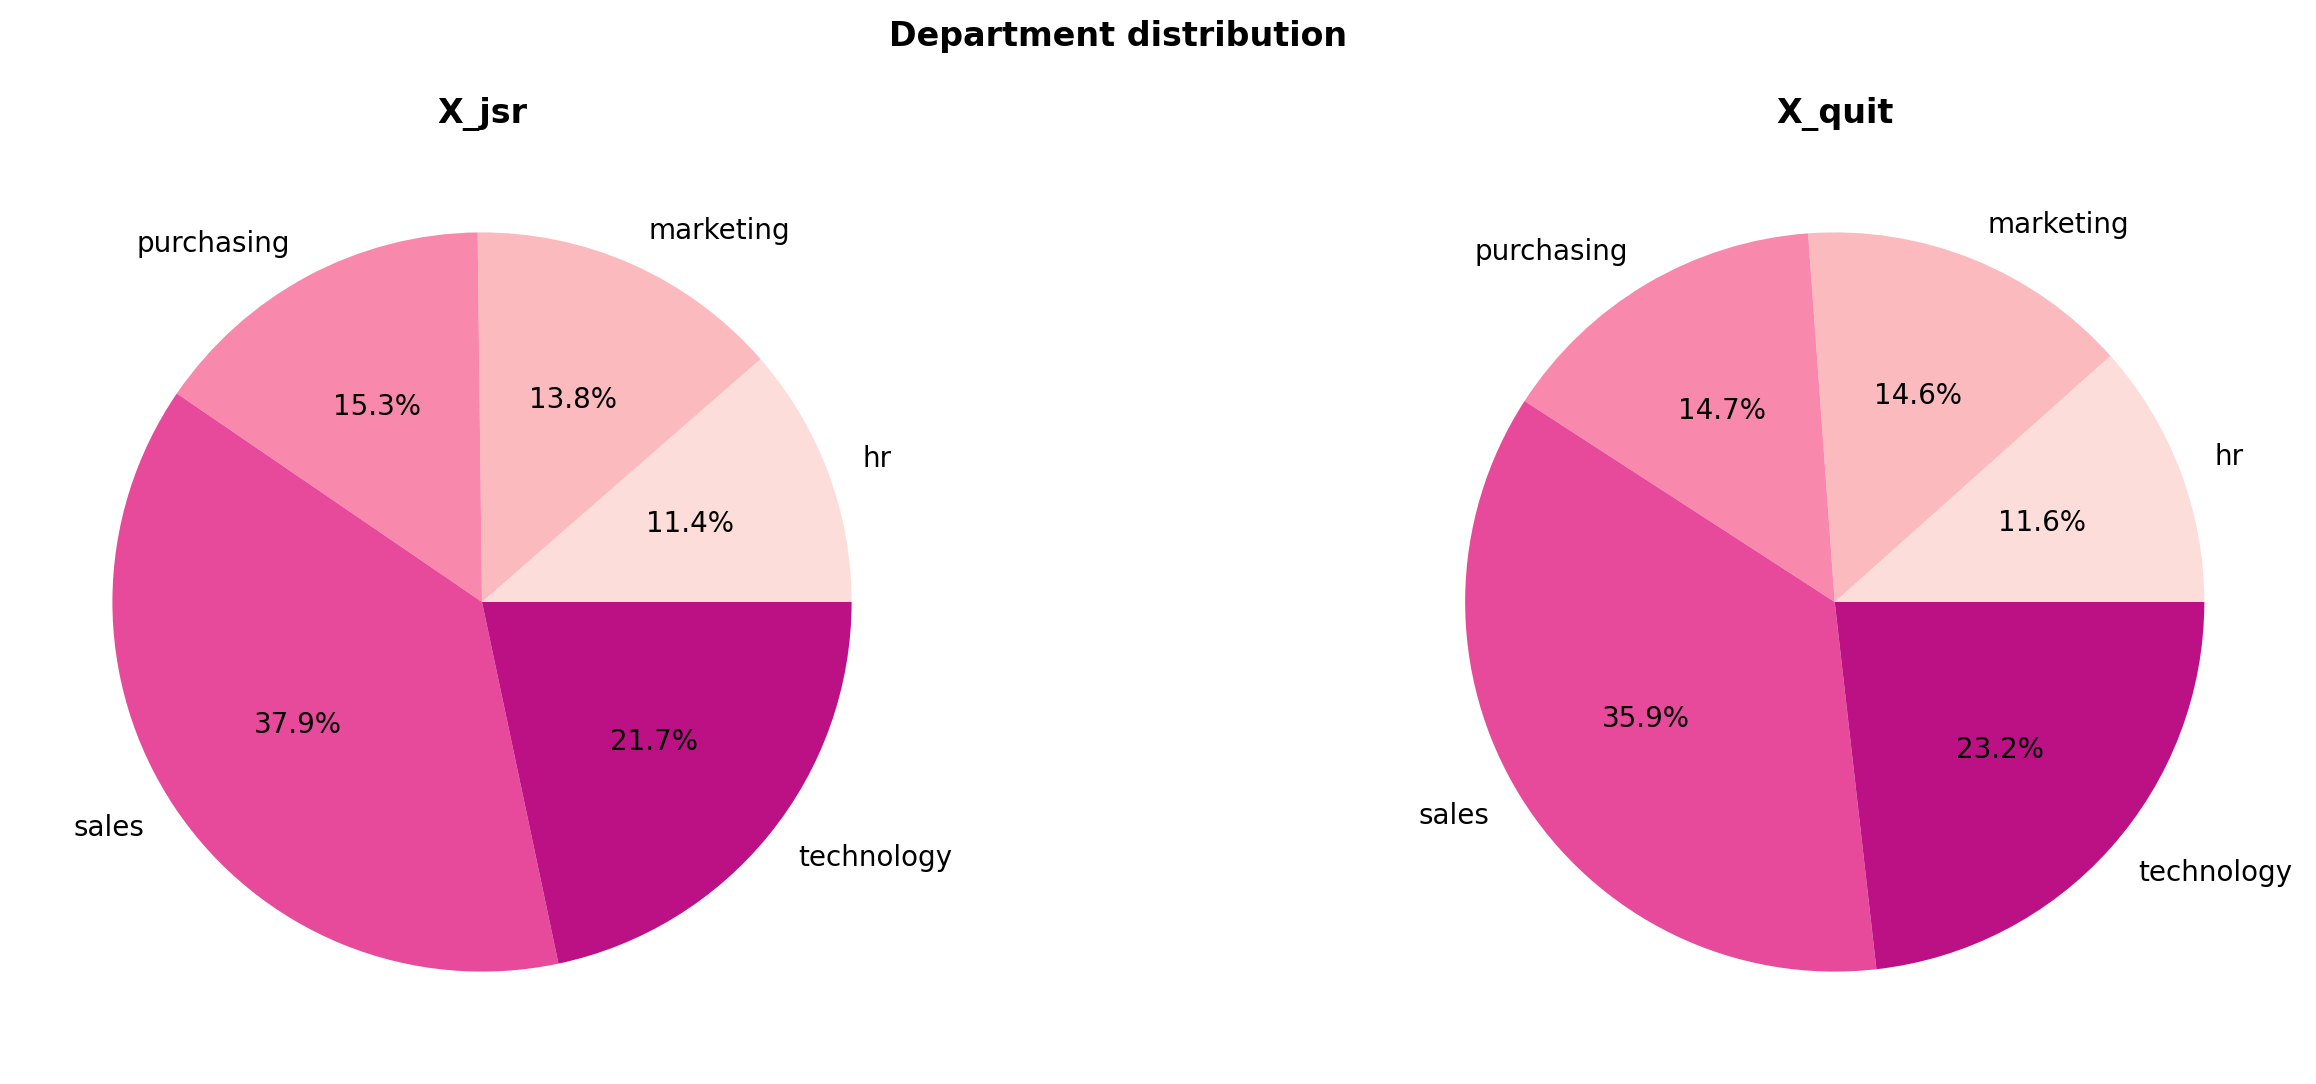

In [23]:
draw_pie_chart(data=[X_jsr, X_quit],
               column='dept',
               title='Department distribution',
               colors=sns.color_palette('RdPu'))

**Observations:** 

The feature is categorical, can have 5 values. The distribution of categories in both datasets is approximately the same. The most numerous department is Sales, while the least numerous is HR.

### Feature `level`

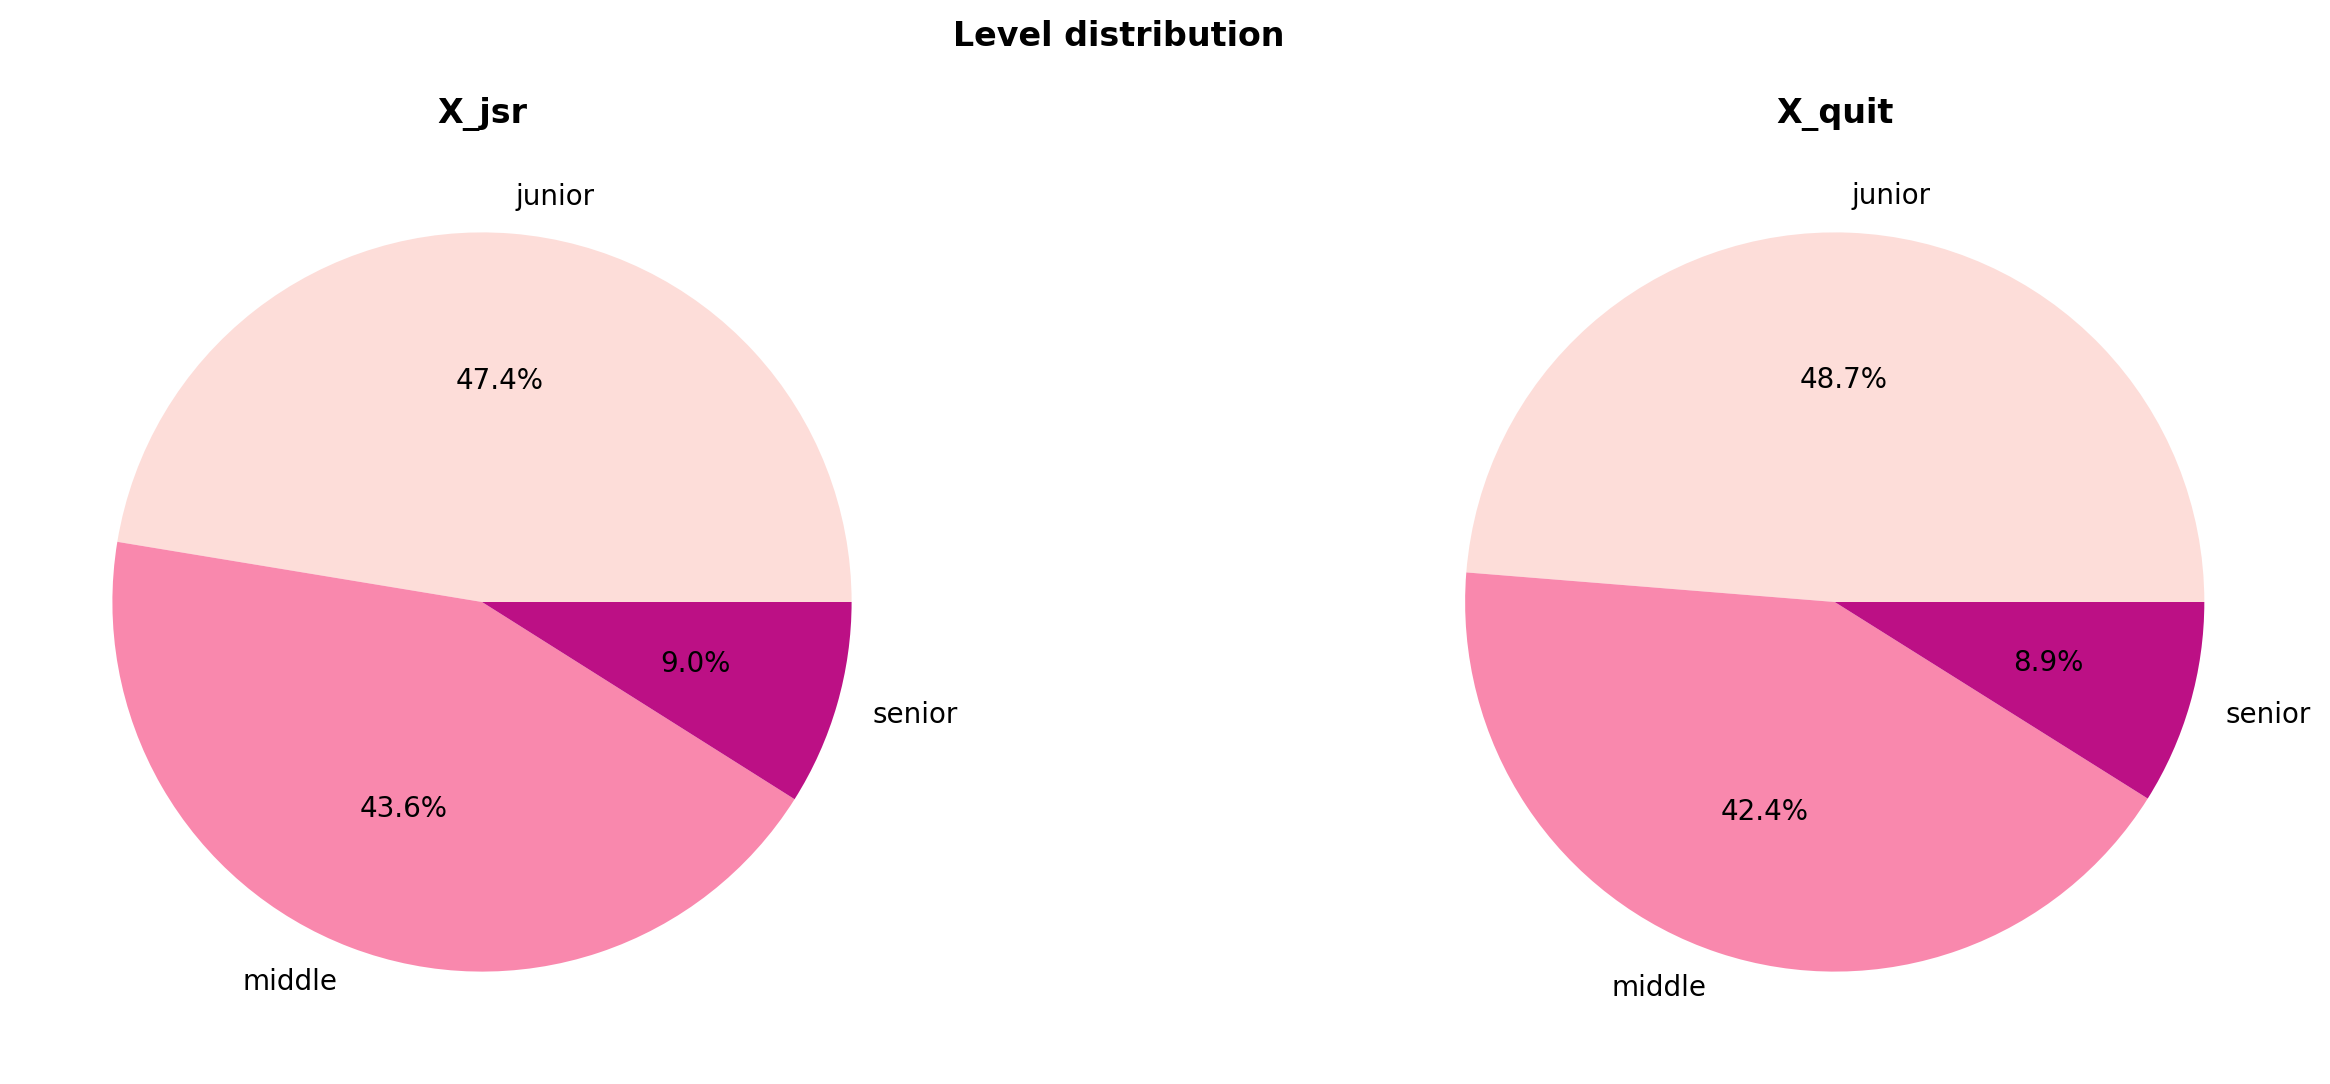

In [24]:
draw_pie_chart(data=[X_jsr, X_quit],
               column='level',
               title='Level distribution',
               colors=[sns.color_palette('RdPu')[0], sns.color_palette('RdPu')[2], sns.color_palette('RdPu')[4]])

**Observations**: 

The feature is categorical, can have 3 values. The distribution of categories in both datasets is approximately the same. Senior is the least numerous category (around 9%), while Junior and Middle are distributed roughly equally (48% and 43% respectively).

### Feature `workload`

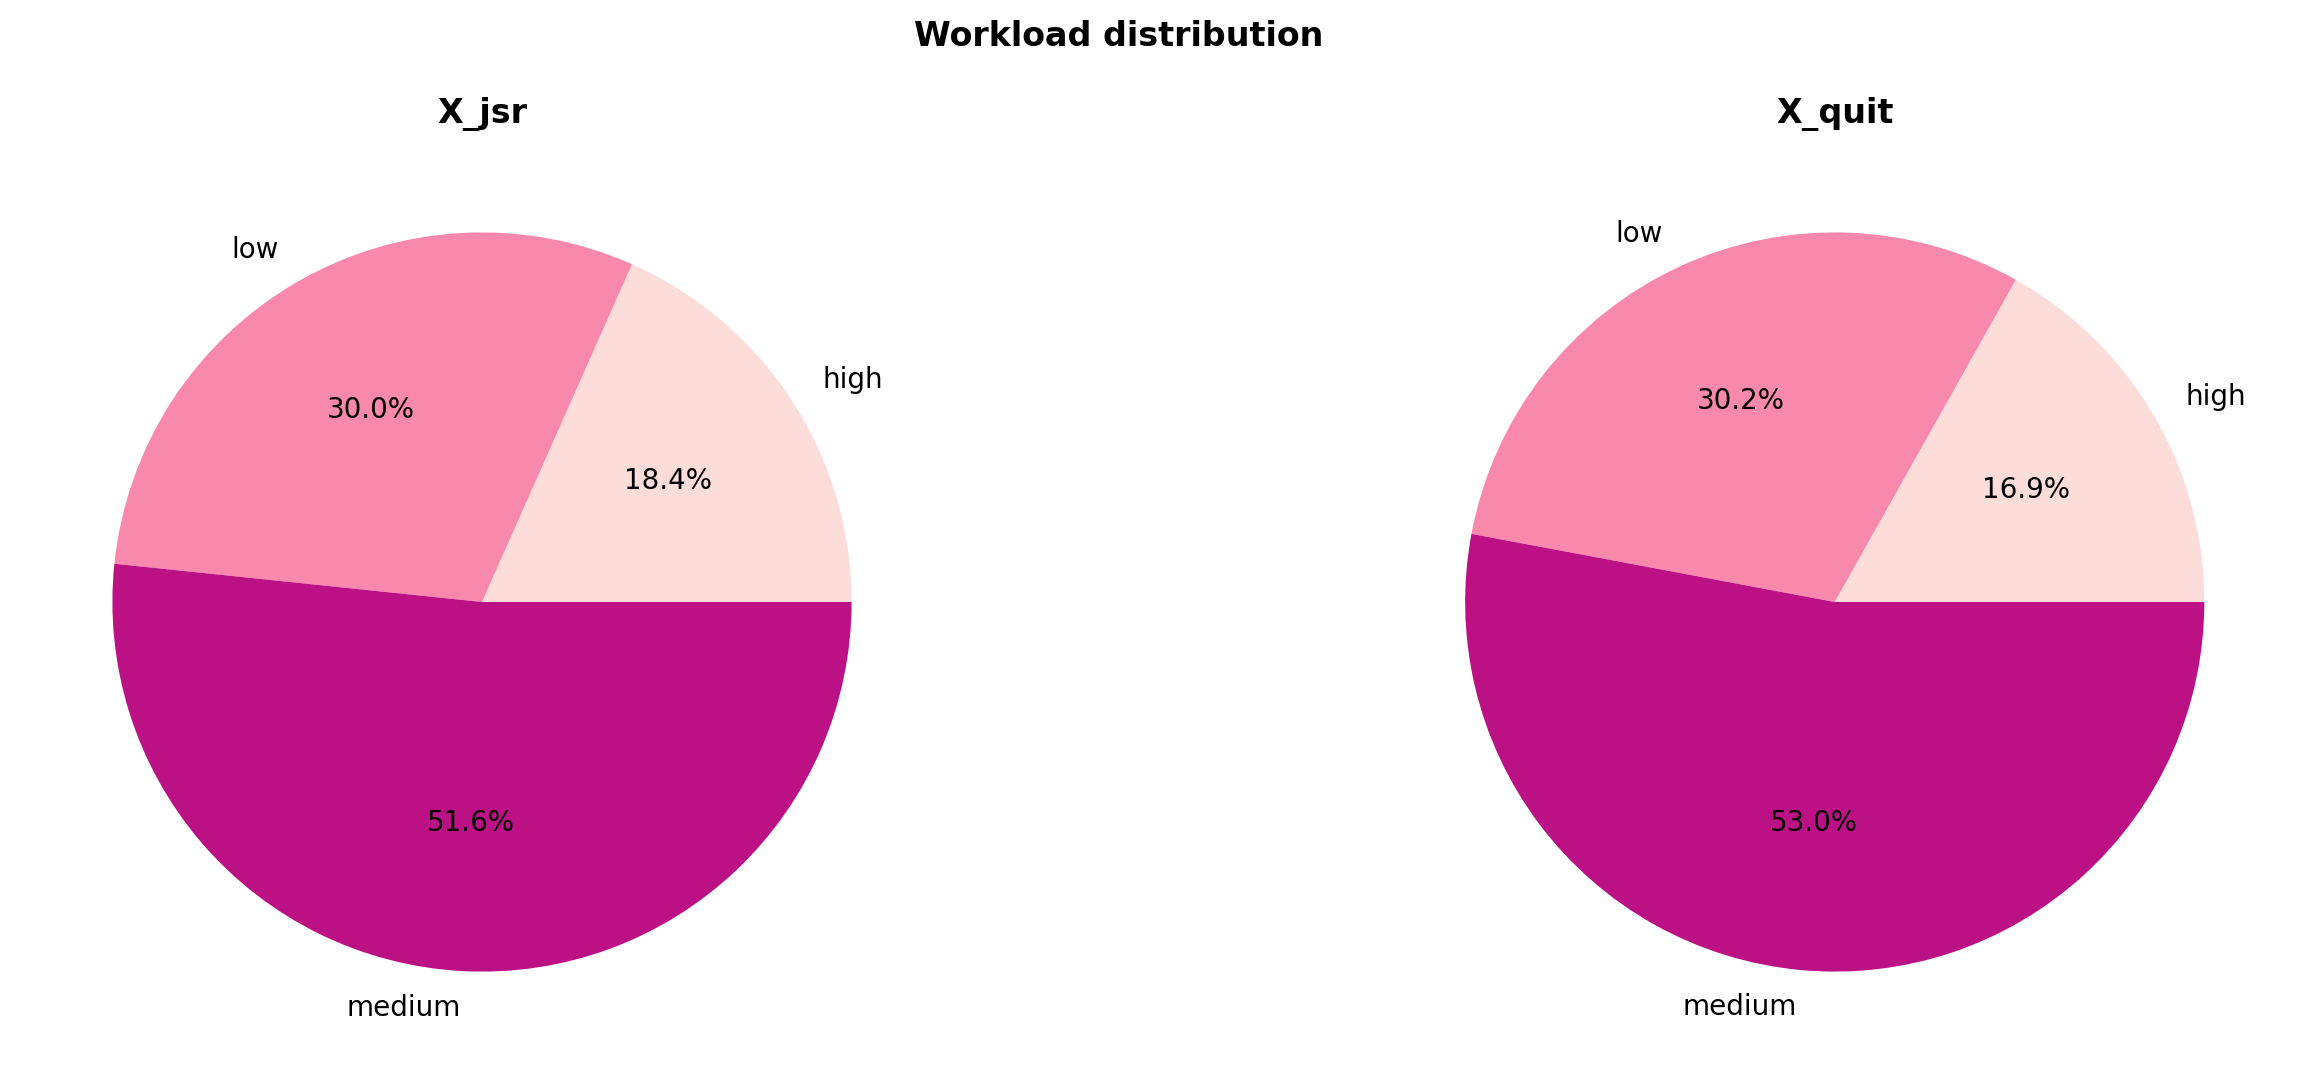

In [25]:
draw_pie_chart(data=[X_jsr, X_quit],
               column='workload',
               title='Workload distribution',
               colors=[sns.color_palette('RdPu')[0], sns.color_palette('RdPu')[2], sns.color_palette('RdPu')[4]])

**Observations:**

The feature is categorical, can have 3 values. The distribution of categories in both datasets is approximately the same. Among employees, 51-53% have a moderate workload, 17-18% have a high workload, and the remaining 30% have a low workload.

### Feature `employment_years`

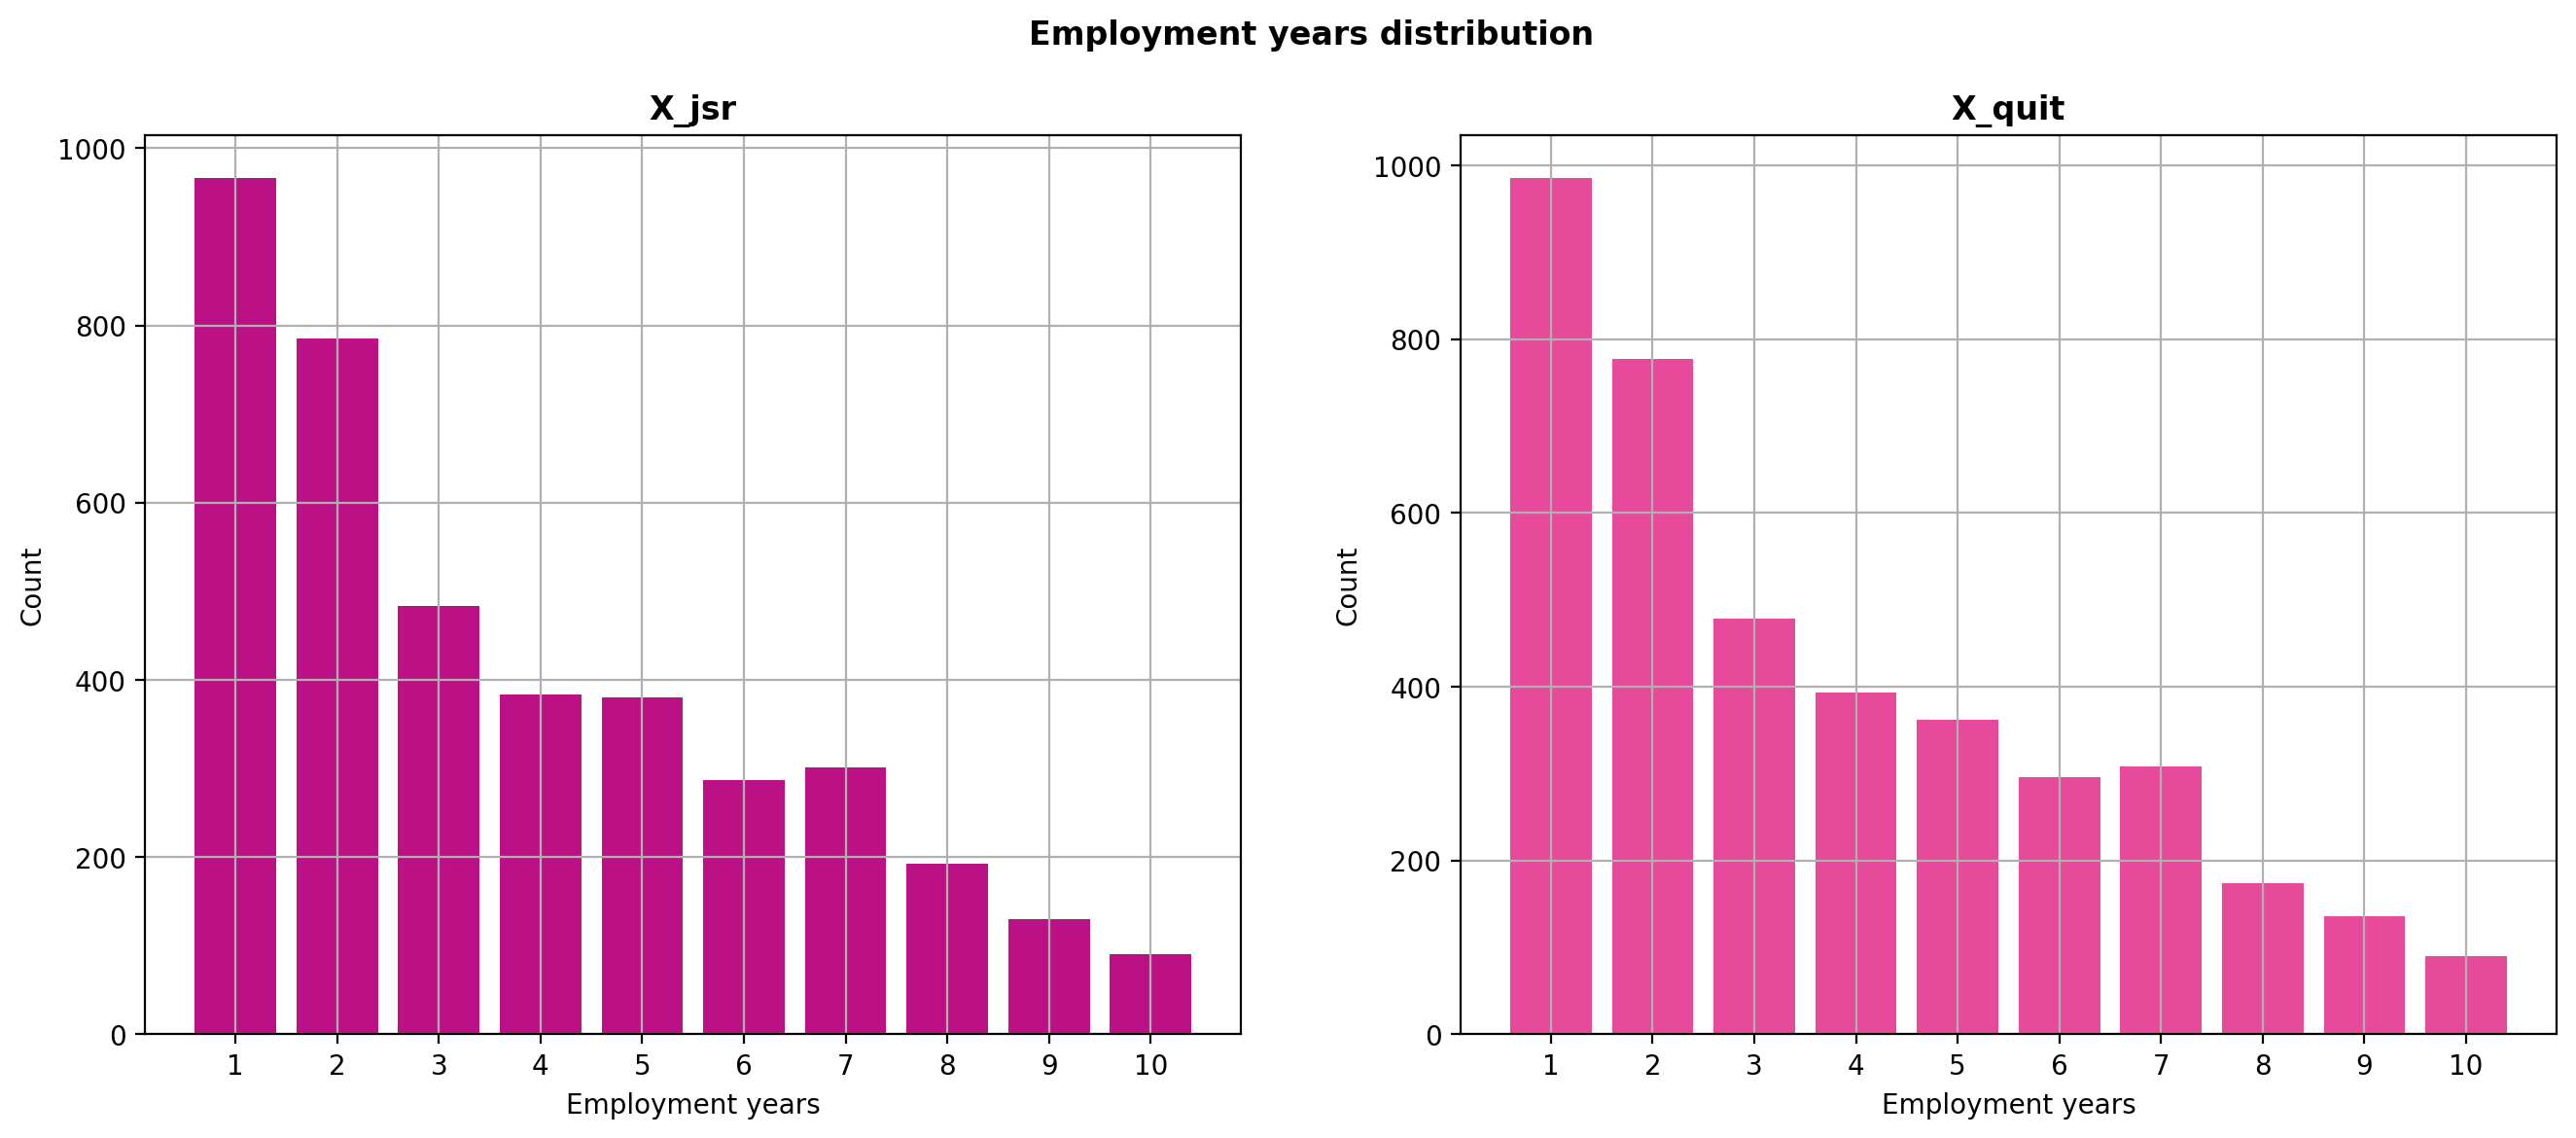

In [26]:
draw_bar_plot(data=[X_jsr, X_quit],
              column='employment_years',
              title='Employment years distribution',
              xlabel='Employment years')

**Observations**: 

The feature is quantitative, taking integer values from 1 to 10. The distribution of feature values in both datasets is approximately the same. The most common value for the feature is 1 year.

### Feature `last_year_promo`

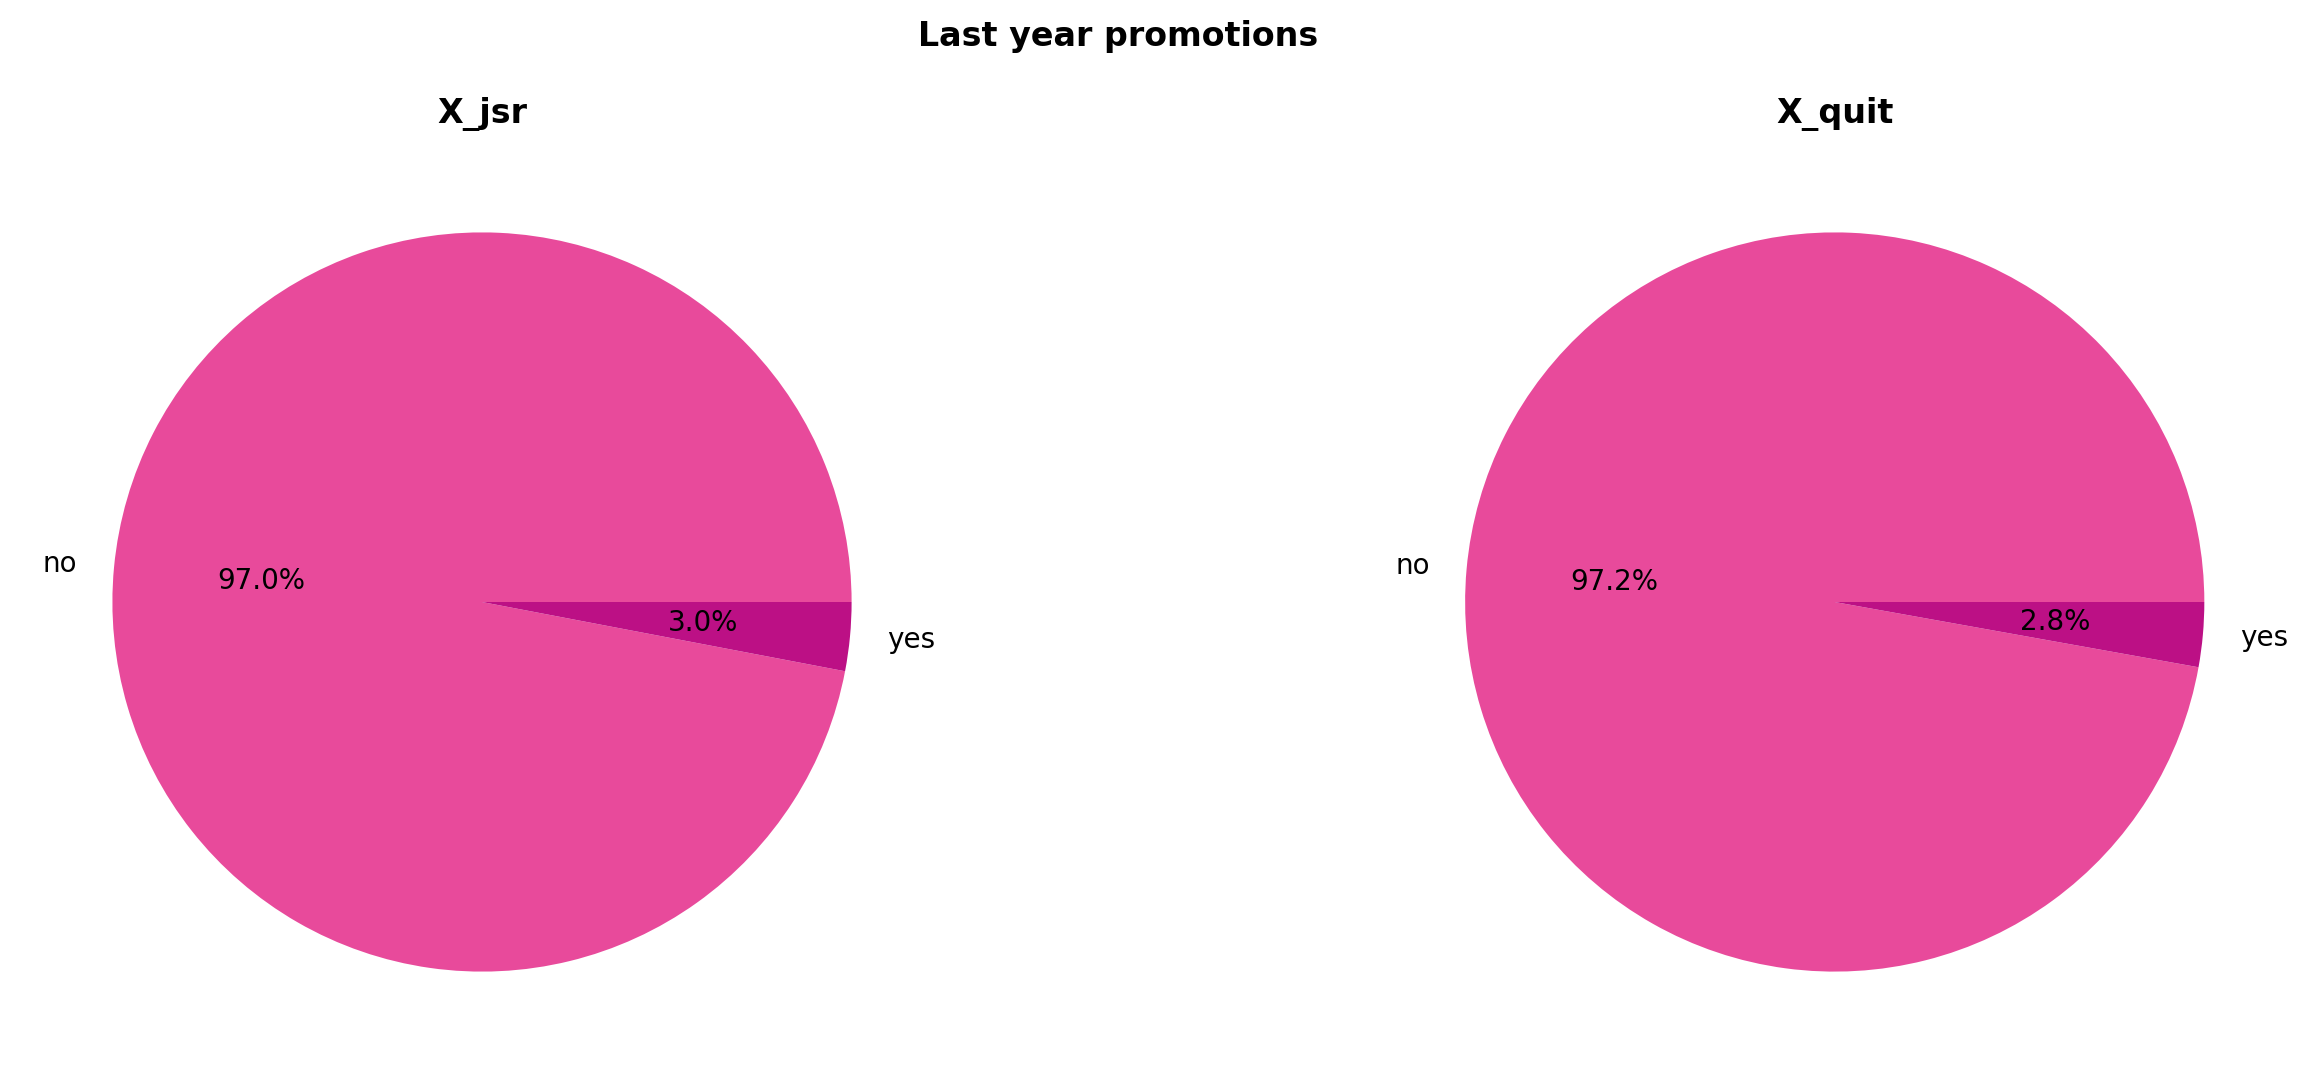

In [27]:
draw_pie_chart(data=[X_jsr, X_quit],
               column='last_year_promo',
               title='Last year promotions',
               colors=[sns.color_palette('RdPu')[3], sns.color_palette('RdPu')[4]])

**Observations**: 

The feature is binary categorical. The distribution of categories in both datasets is approximately the same. 97% of employees did not receive a promotion last year, while 3% did.

### Feature `last_year_violations`

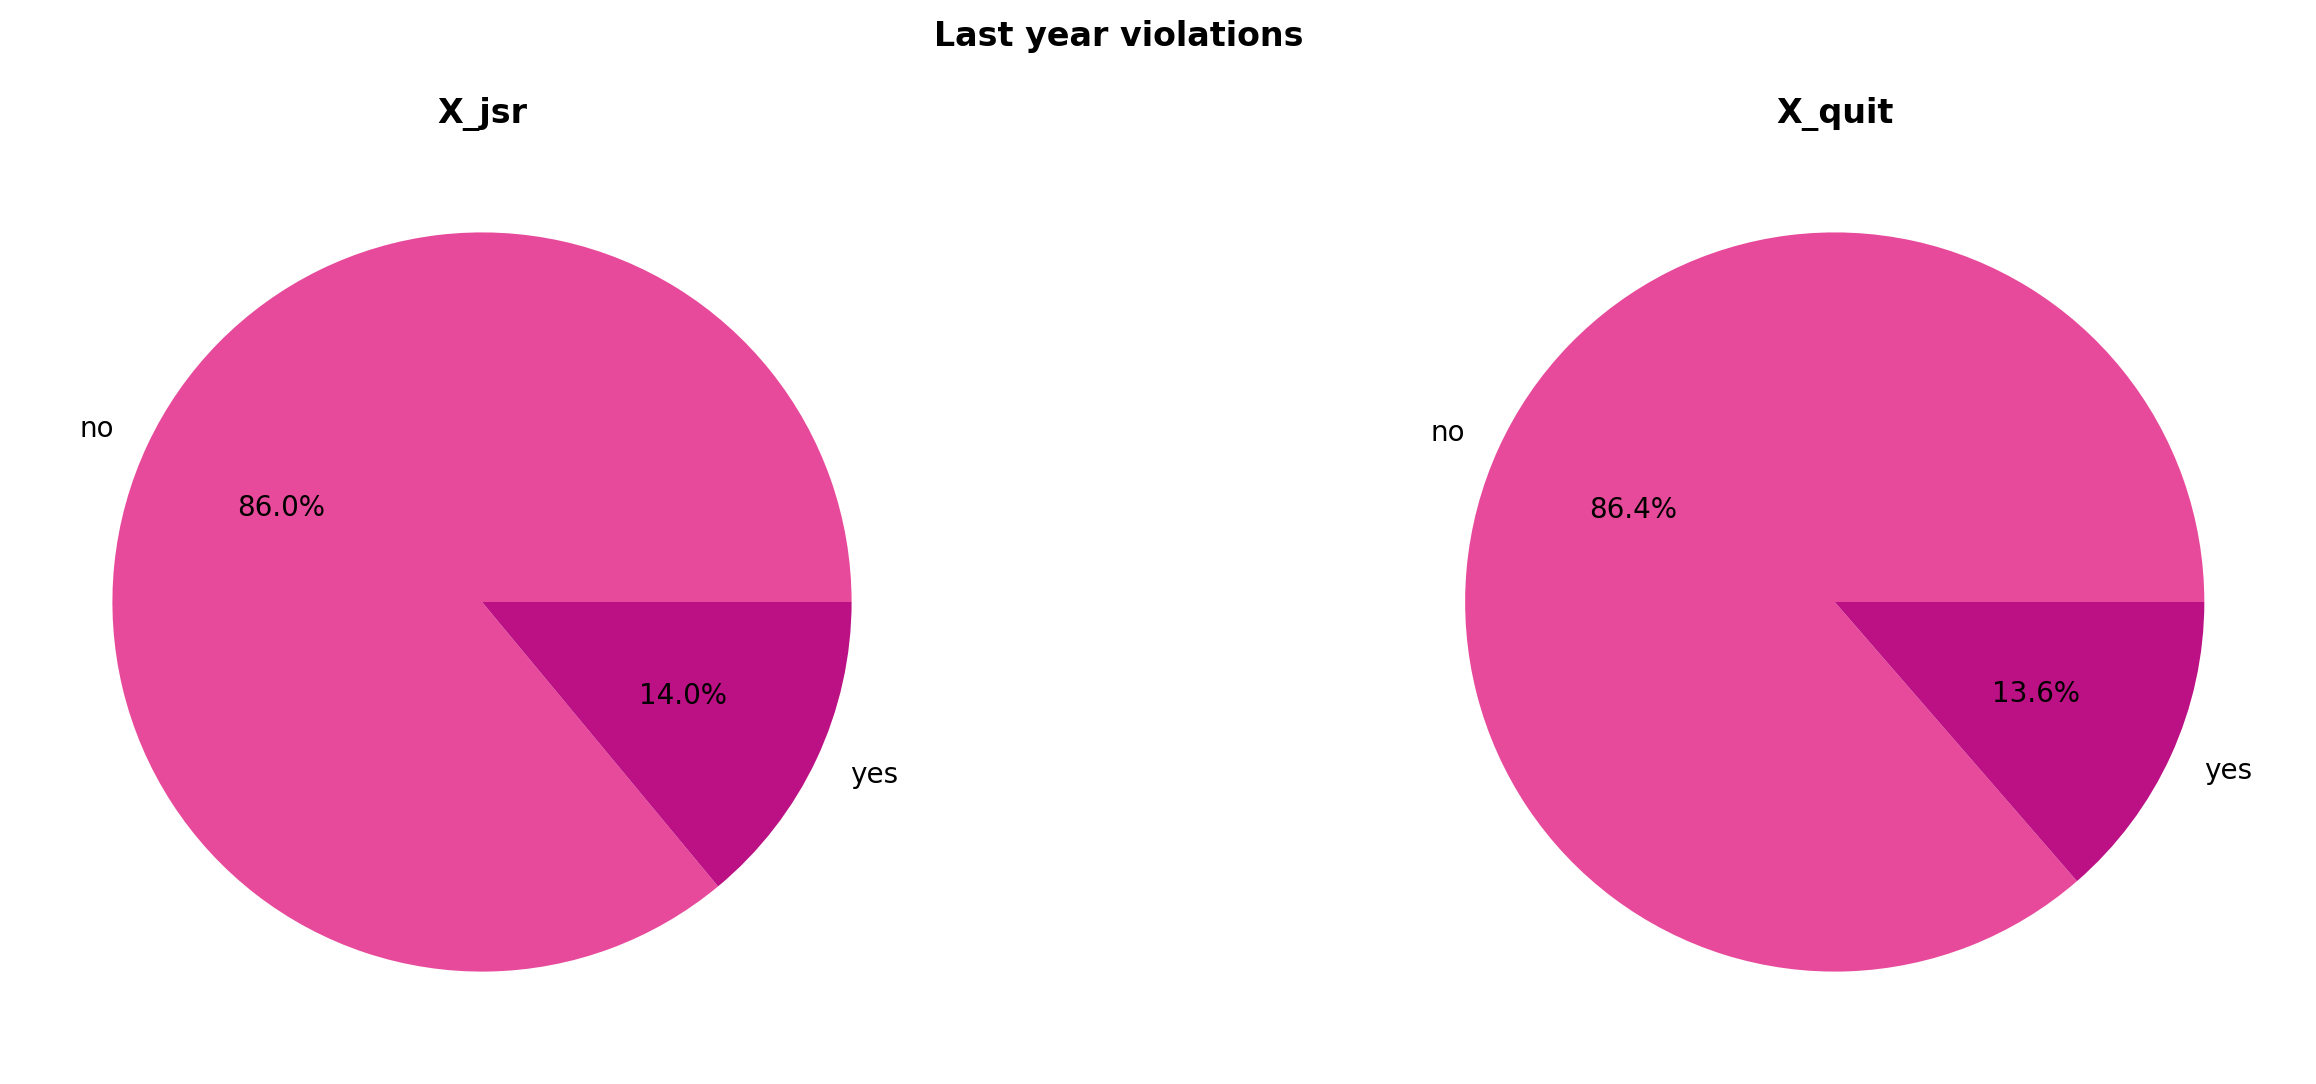

In [28]:
draw_pie_chart(data=[X_jsr, X_quit],
               column='last_year_violations',
               title='Last year violations',
               colors=[sns.color_palette('RdPu')[3], sns.color_palette('RdPu')[4]])

**Observations**: 

The feature is binary categorical. The distribution of categories in both datasets is approximately the same. 86% of employees did not violate the contract last year, while 14% did.

### Feature `supervisor_evaluation`

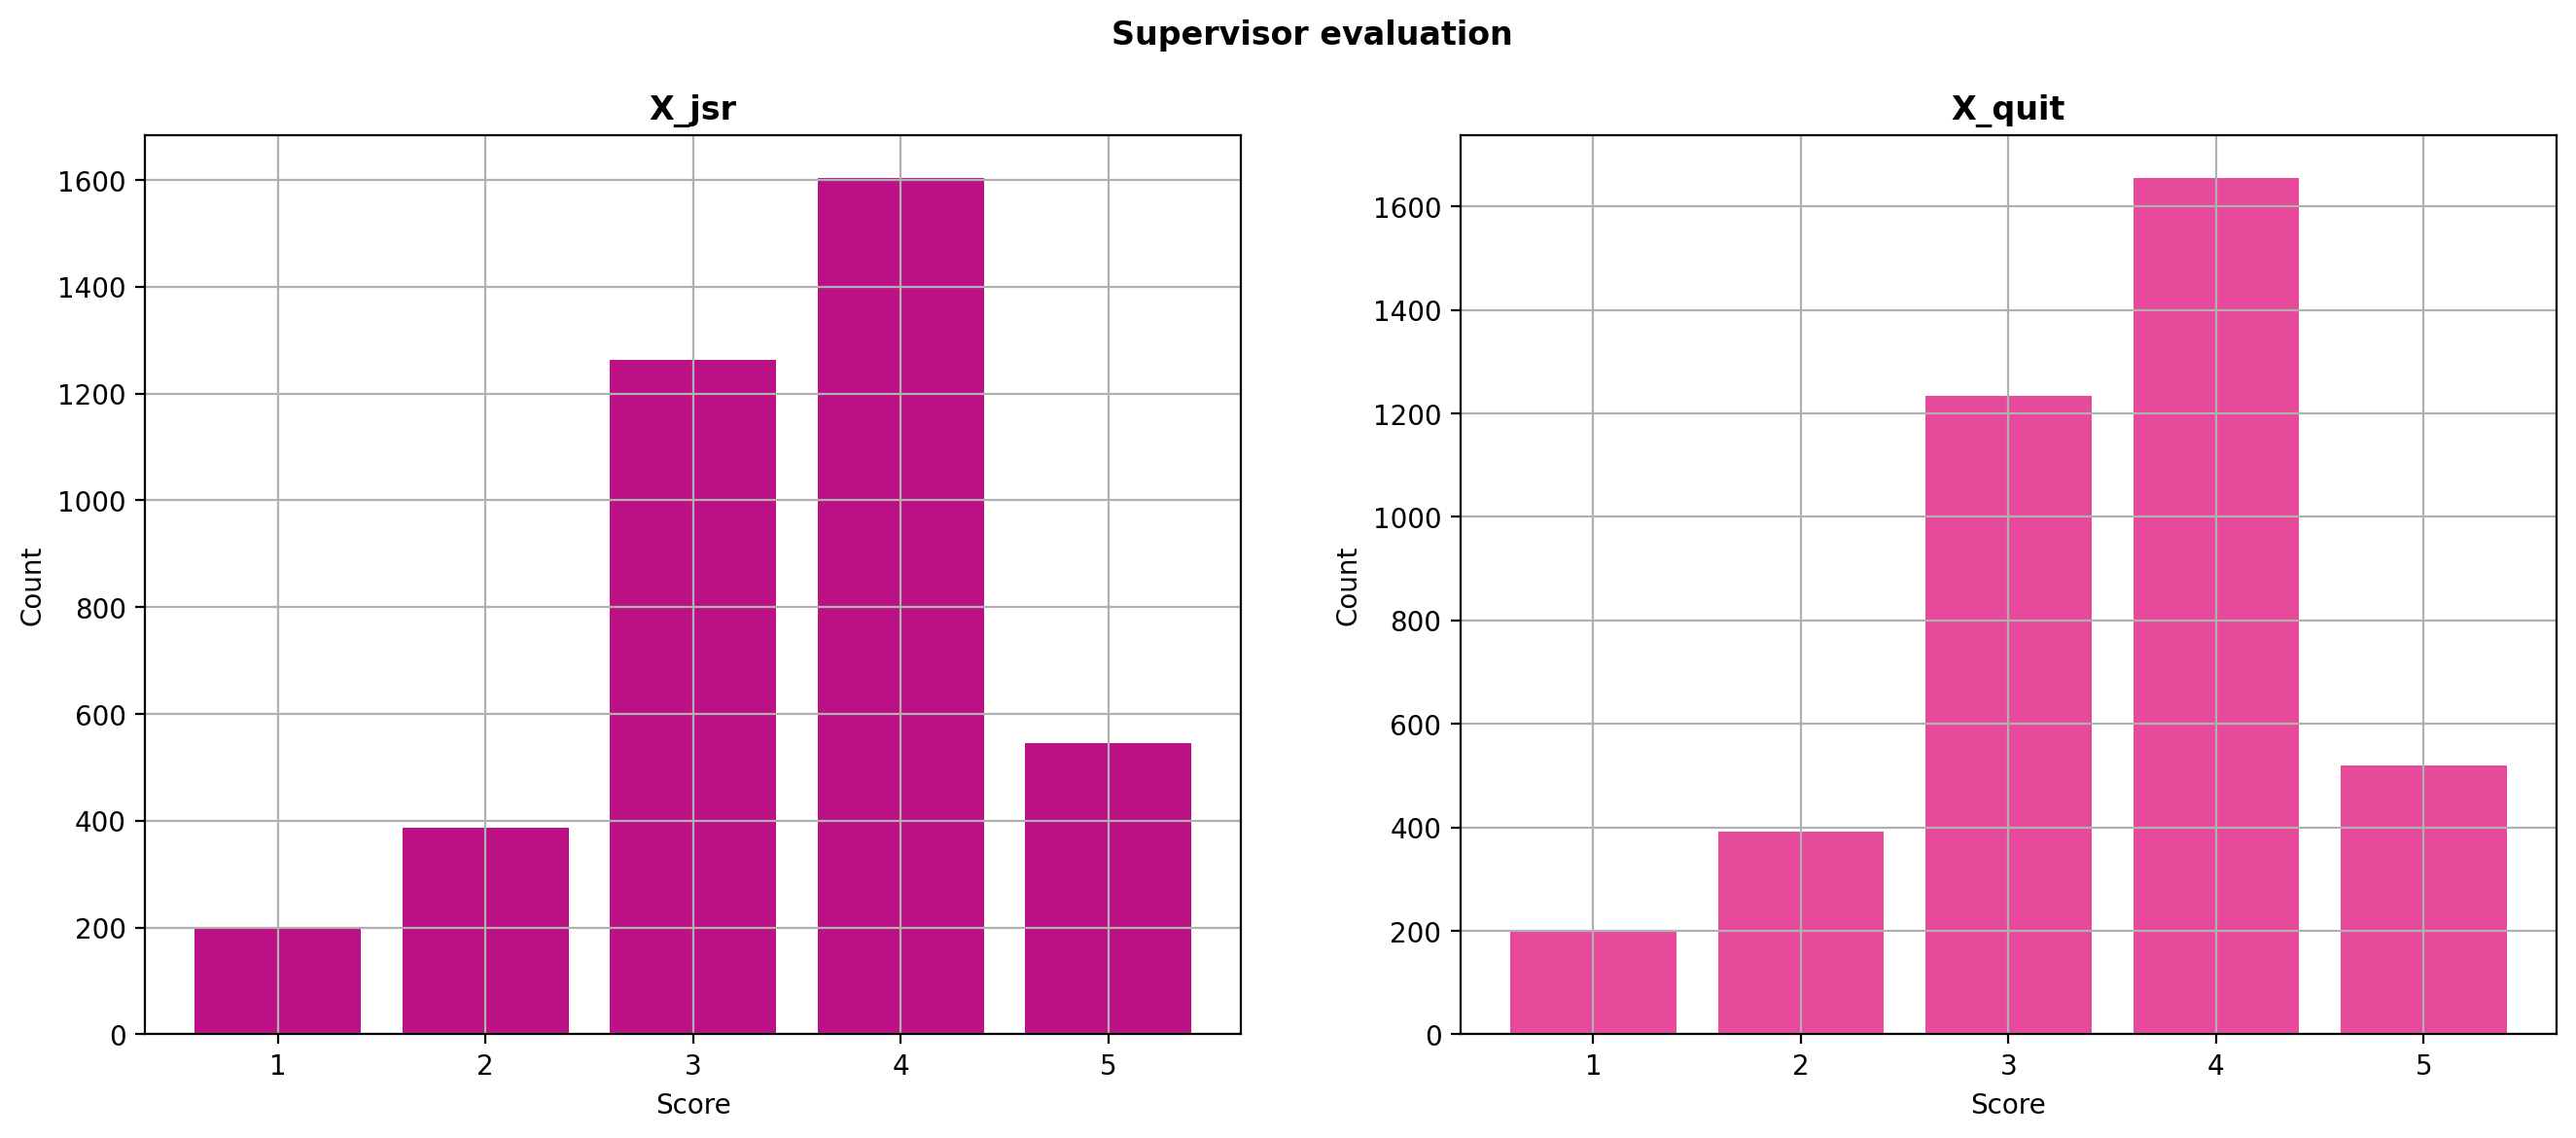

In [29]:
draw_bar_plot(data=[X_jsr, X_quit],
              column='supervisor_evaluation',
              title='Supervisor evaluation',
              xlabel='Score')

**Observations**: 

The feature is quantitative, taking integer values from 1 to 5. The distribution of feature values in both datasets is approximately the same. The most common value for the feature is 4.

### Feature `salary`

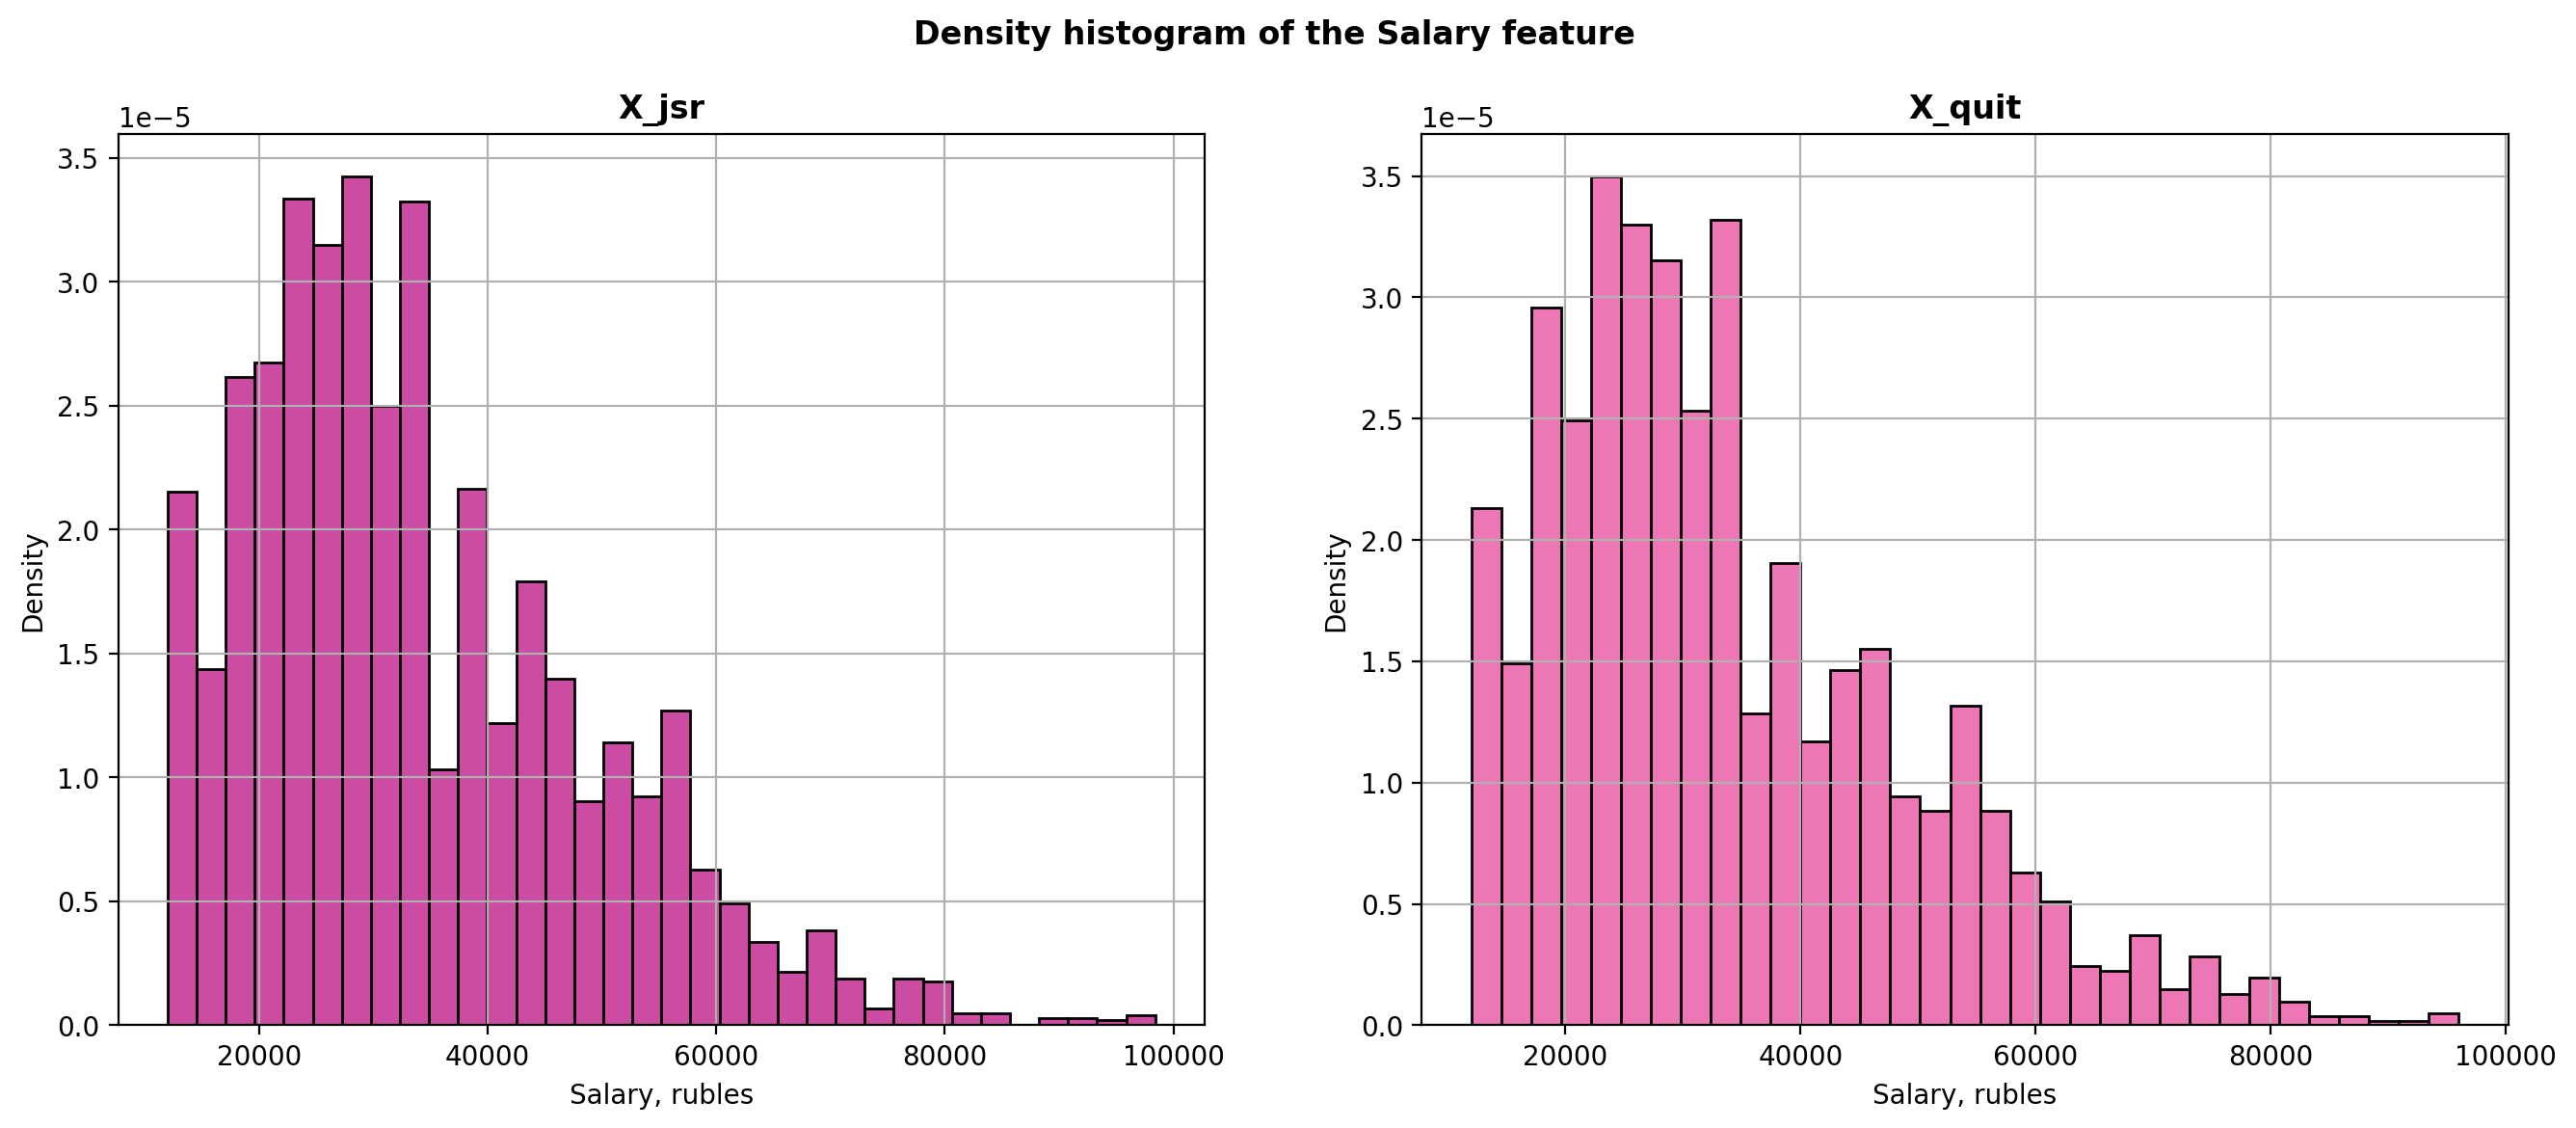

,X_jsr,X_quit
count,4000.0,4000.00
mean,33926.7,33805.80
std,14900.7,15152.42
min,12000.0,12000.00
25%,22800.0,22800.00
50%,30000.0,30000.00
75%,43200.0,43200.00
max,98400.0,96000.00


In [30]:
draw_norm_histogram_describe(data=[X_jsr,X_quit],
                             column='salary',
                             xlabel='Salary, rubles',
                             title='Density histogram of the Salary feature')

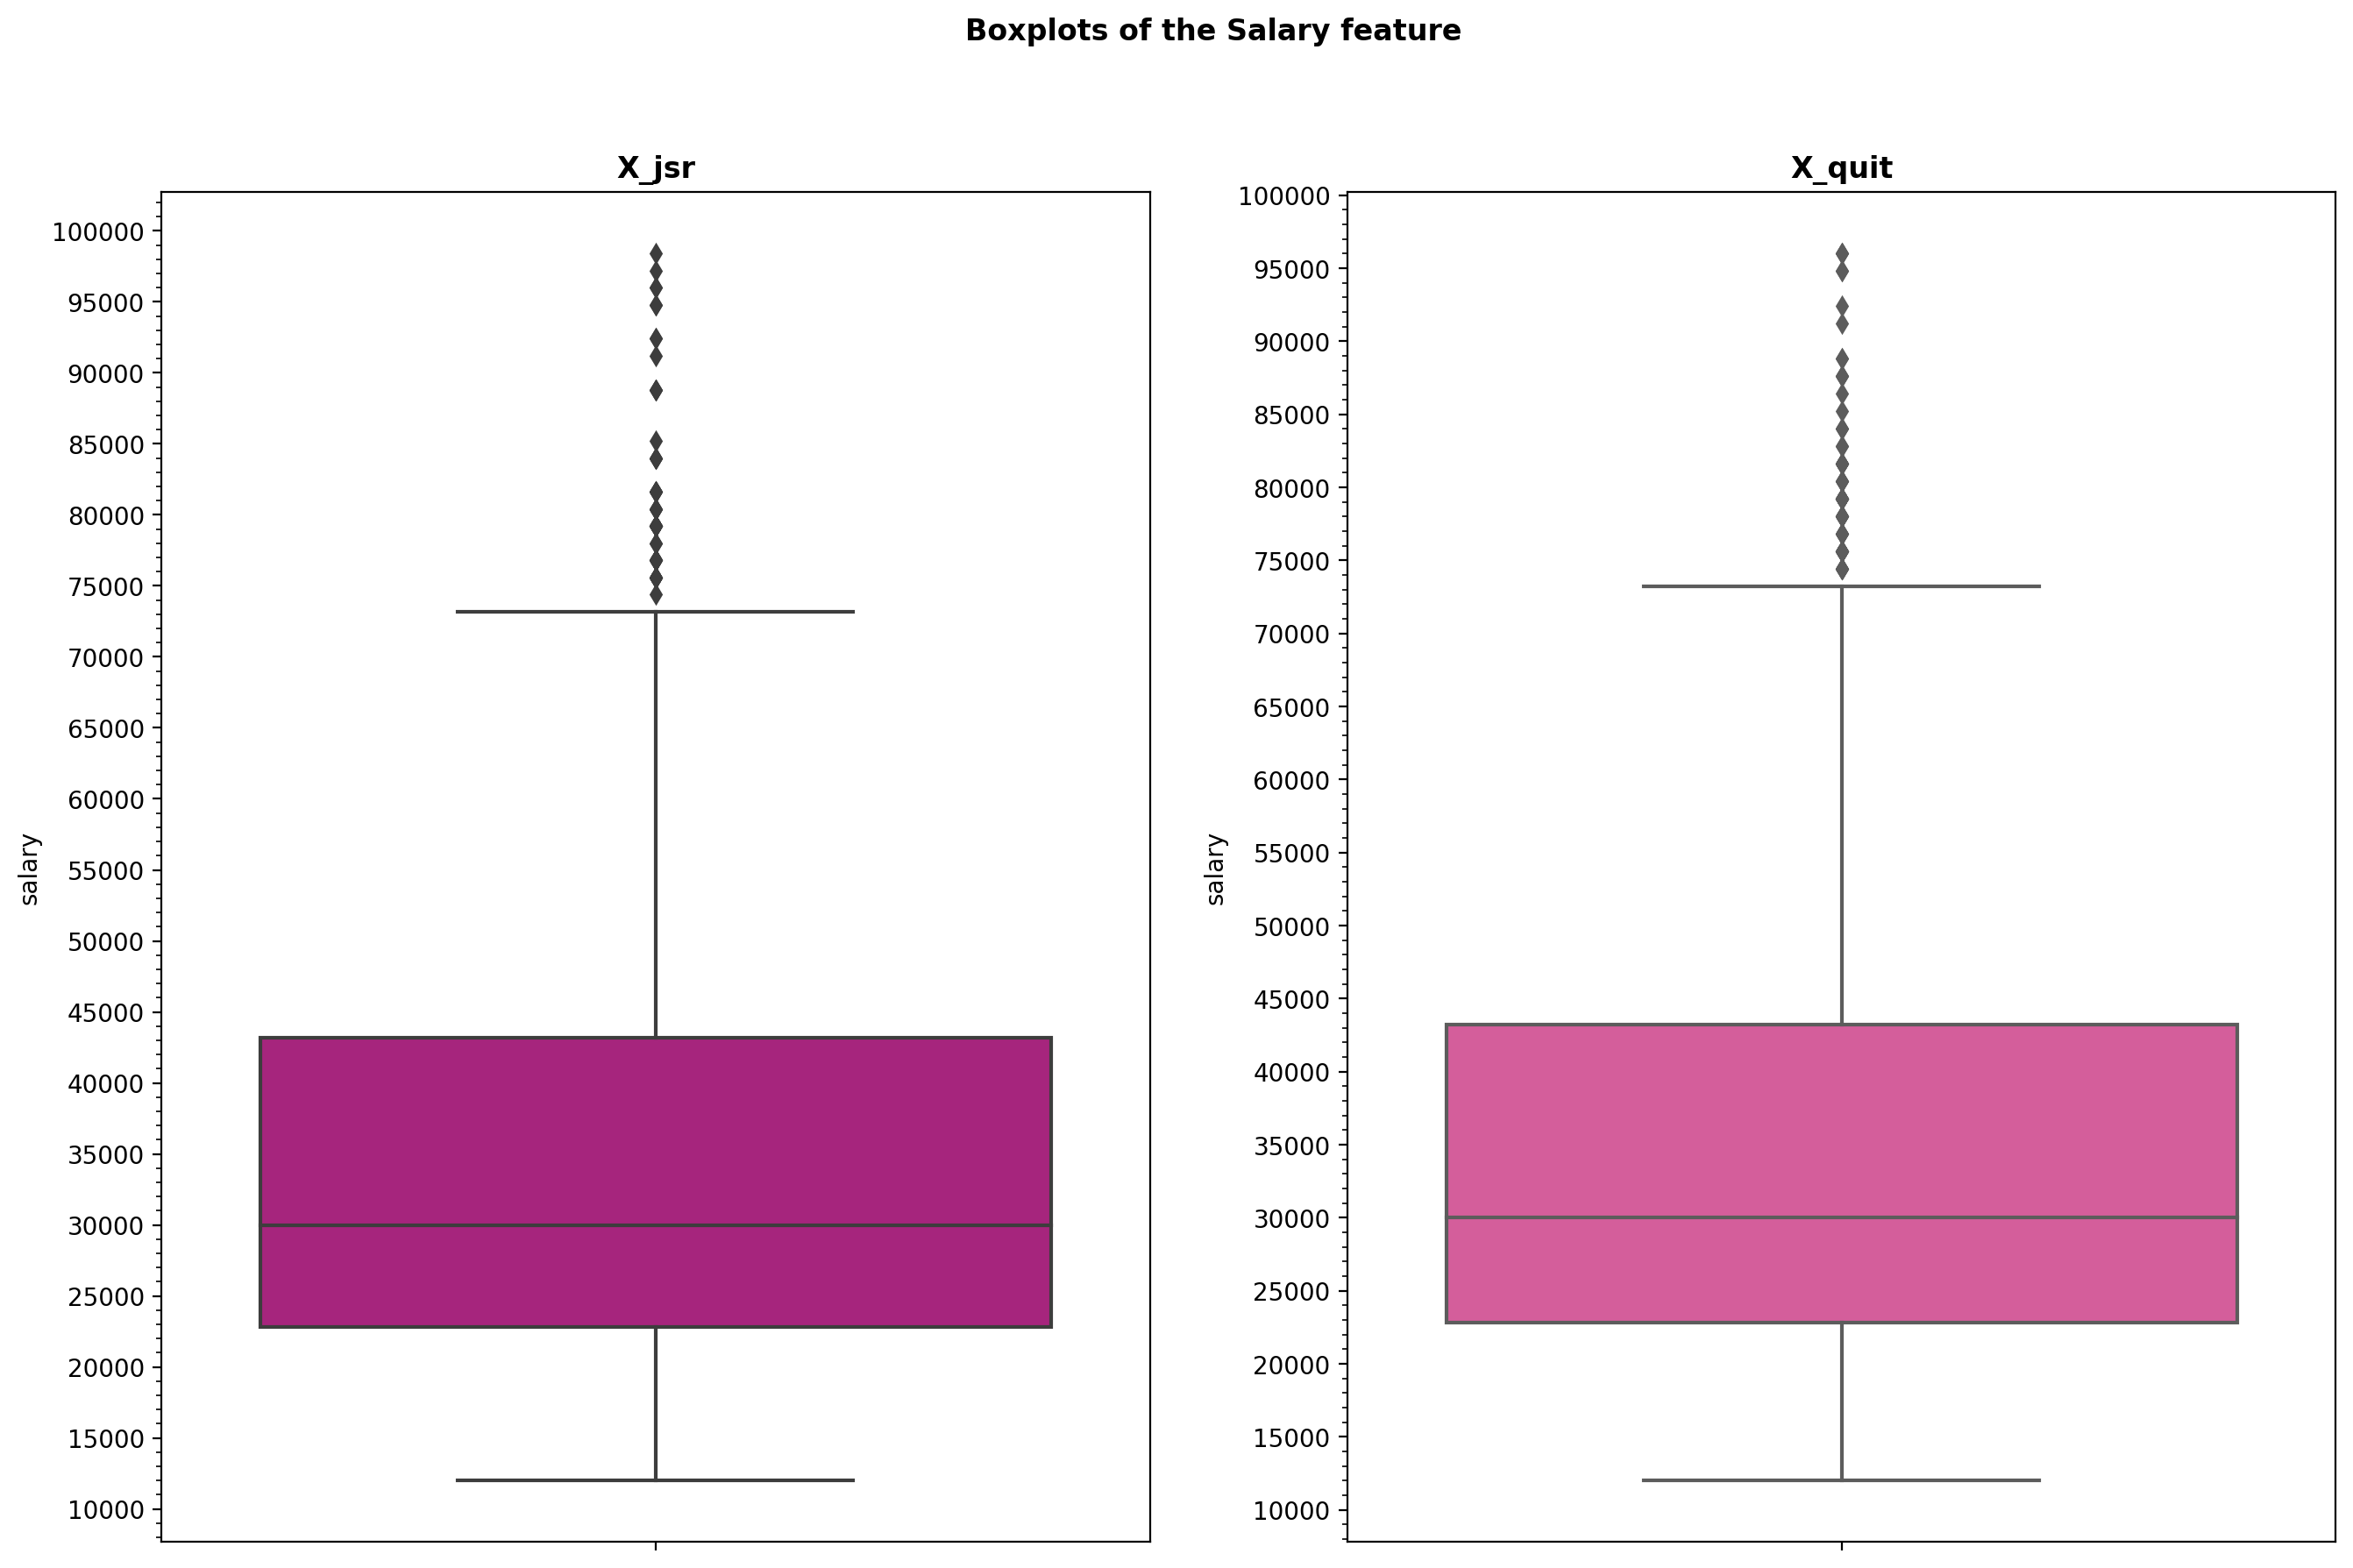

In [31]:
draw_boxplot(data=[X_jsr, X_quit],
             column='salary',
             title='Boxplots of the Salary feature',
             ylabel='Salary, rubles')

**Observations:**

The feature is quantitative. The distribution of feature values in both datasets is approximately the same, non-normal, and contains outliers at the upper end. The median salary of employees is 30,000 rubles.

### Target feature `job_satisfaction_rate`

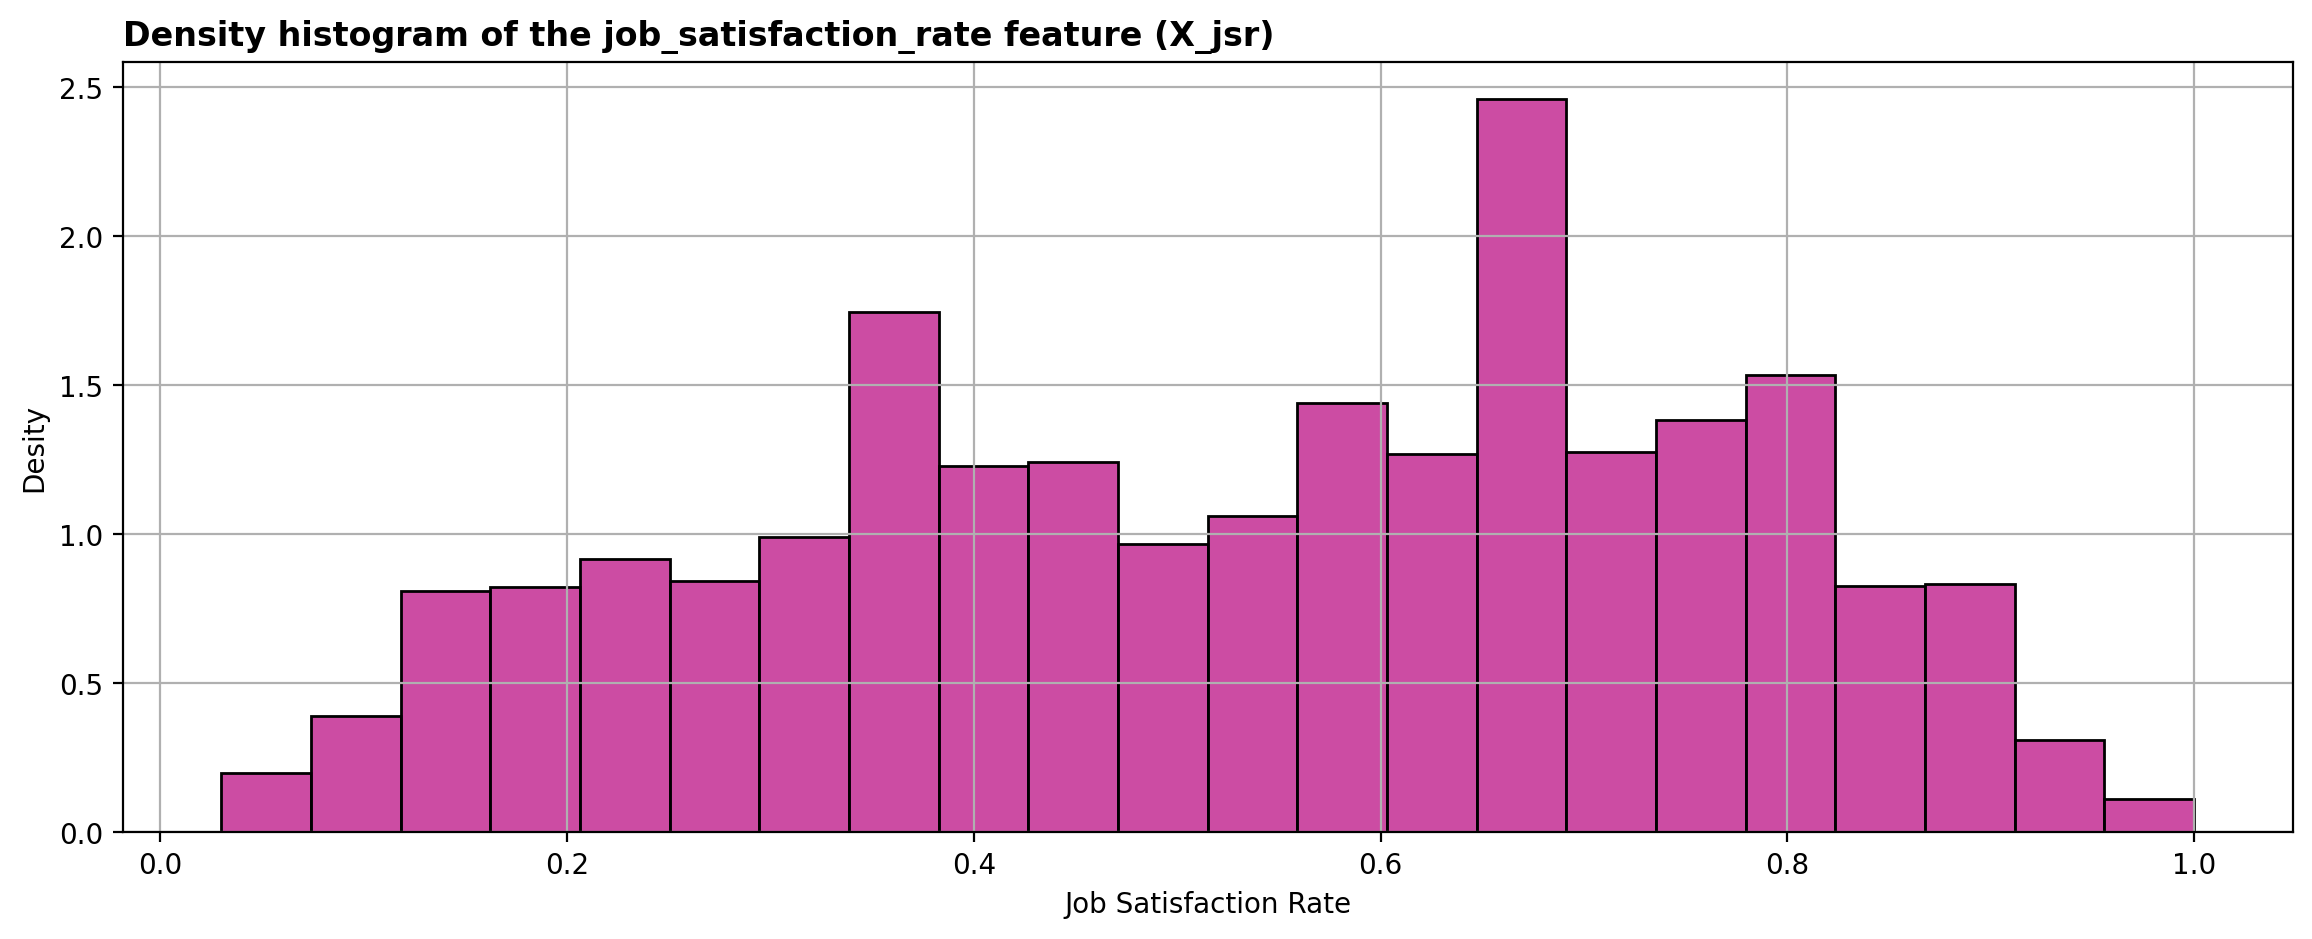

,X_jsr
count,4000.00
mean,0.53
std,0.23
min,0.03
25%,0.36
50%,0.56
75%,0.71
max,1.00


In [32]:
# Histogram and descriptive statistics
fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('Density histogram of the job_satisfaction_rate feature (X_jsr)',
             loc='left',
             fontweight='semibold')
ax.grid()
ax.set_xlabel('Job Satisfaction Rate')
ax.set_ylabel('Desity')
sns.histplot(data=X_jsr,
             x='job_satisfaction_rate',
             stat='density',
             common_norm=False,
             color=sns.color_palette('RdPu')[4])
plt.show()
display(pd.DataFrame({'X_jsr': pd.Series(X_jsr['job_satisfaction_rate'].describe().round(2))}))

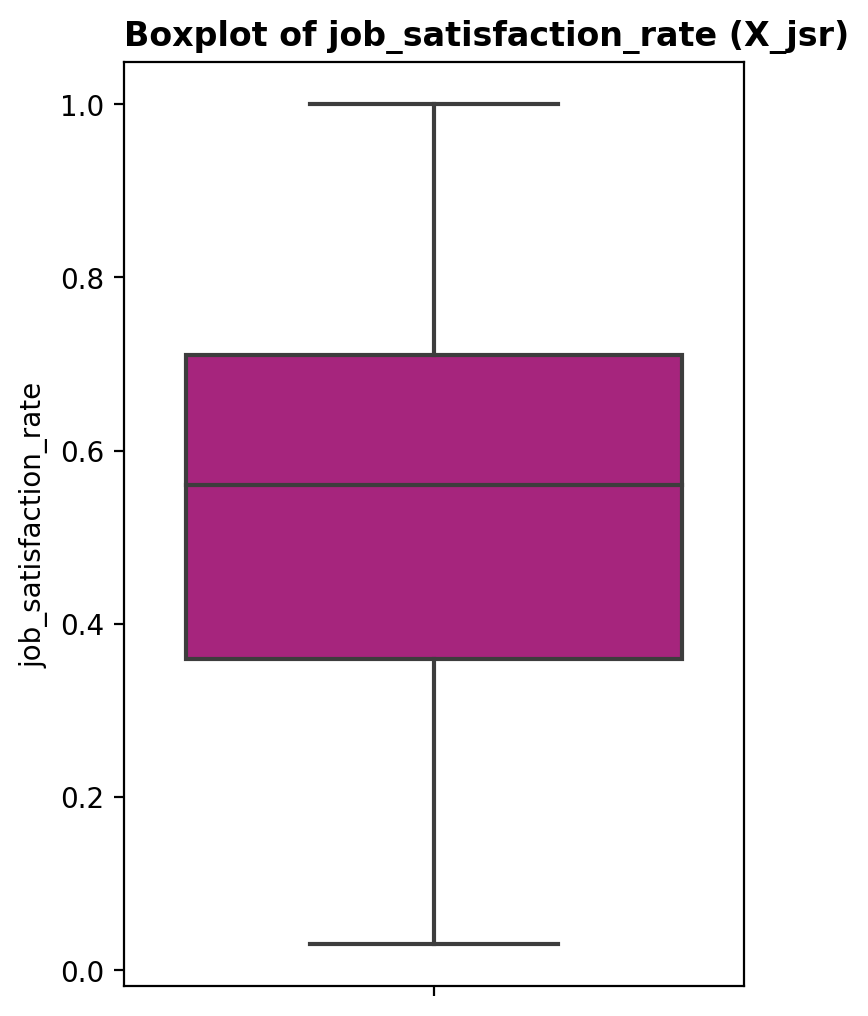

In [33]:
fig, ax = plt.subplots(figsize=(4,6))
ax.set_title('Boxplot of job_satisfaction_rate (X_jsr)',
             loc='left',
             fontweight='semibold')
sns.boxplot(y='job_satisfaction_rate', data=X_jsr, color=sns.color_palette('RdPu')[4], ax=ax)
plt.show()

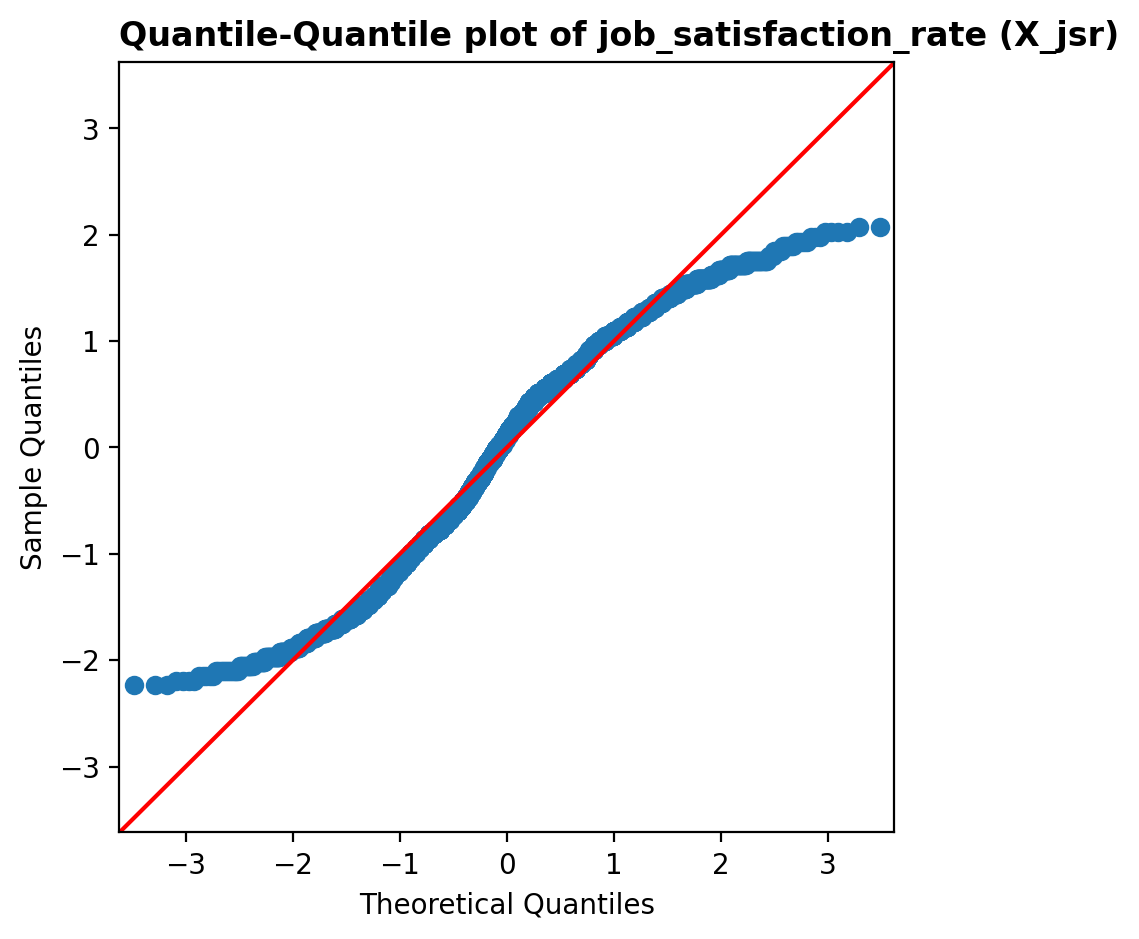

In [34]:
# QQ-plot
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Quantile-Quantile plot of job_satisfaction_rate (X_jsr)',
             loc='left',
             fontweight='semibold')
sm.qqplot(X_jsr['job_satisfaction_rate'], line='45', fit=True, ax=ax)
plt.show()

**Observations**: 

The feature is quantitative. The distribution of the feature is non-normal, ranging from 0.03 to 1. The mean value is 0.53. No outliers are detected.

### Target feature `quit`

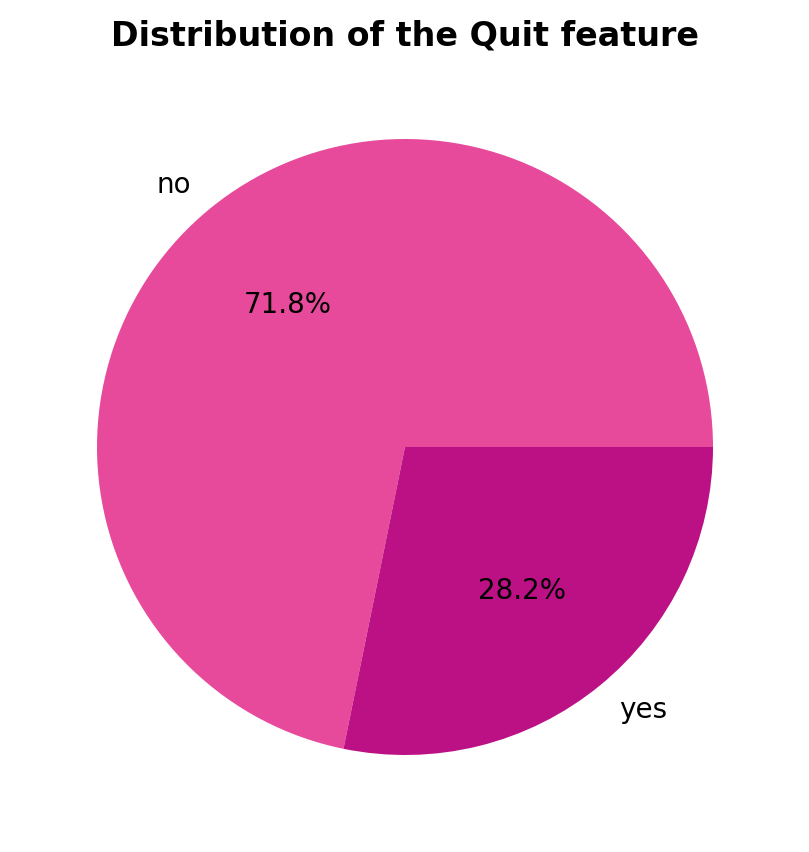

In [35]:
fig, ax = plt.subplots(figsize = (5,5))
data_pivot = X_quit.pivot_table(index='quit', values='salary', aggfunc='count')
ax.set_title('Distribution of the Quit feature',
             fontweight='semibold')
ax.pie(x=data_pivot['salary'],
       labels=data_pivot.index,
       colors=[sns.color_palette('RdPu')[3], sns.color_palette('RdPu')[4]],
       autopct='%1.1f%%')
plt.show()

**Observations**:

The feature is binary categorical. 71.8% of employees continue working, while 28.2% have quit the job. There is an imbalance in the target feature classes, which will affect the choice of evaluation metric during machine learning model training, as not all metrics perform equally well with class imbalance.

### Correlation analysis

Since the dataset contains a large number of categorical features and features with non-normally distributed data, we will use Spearman's rank correlation and the phi-coefficient matrix to analyze the relationships.

#### Correlation analysis of X_jsr dataset

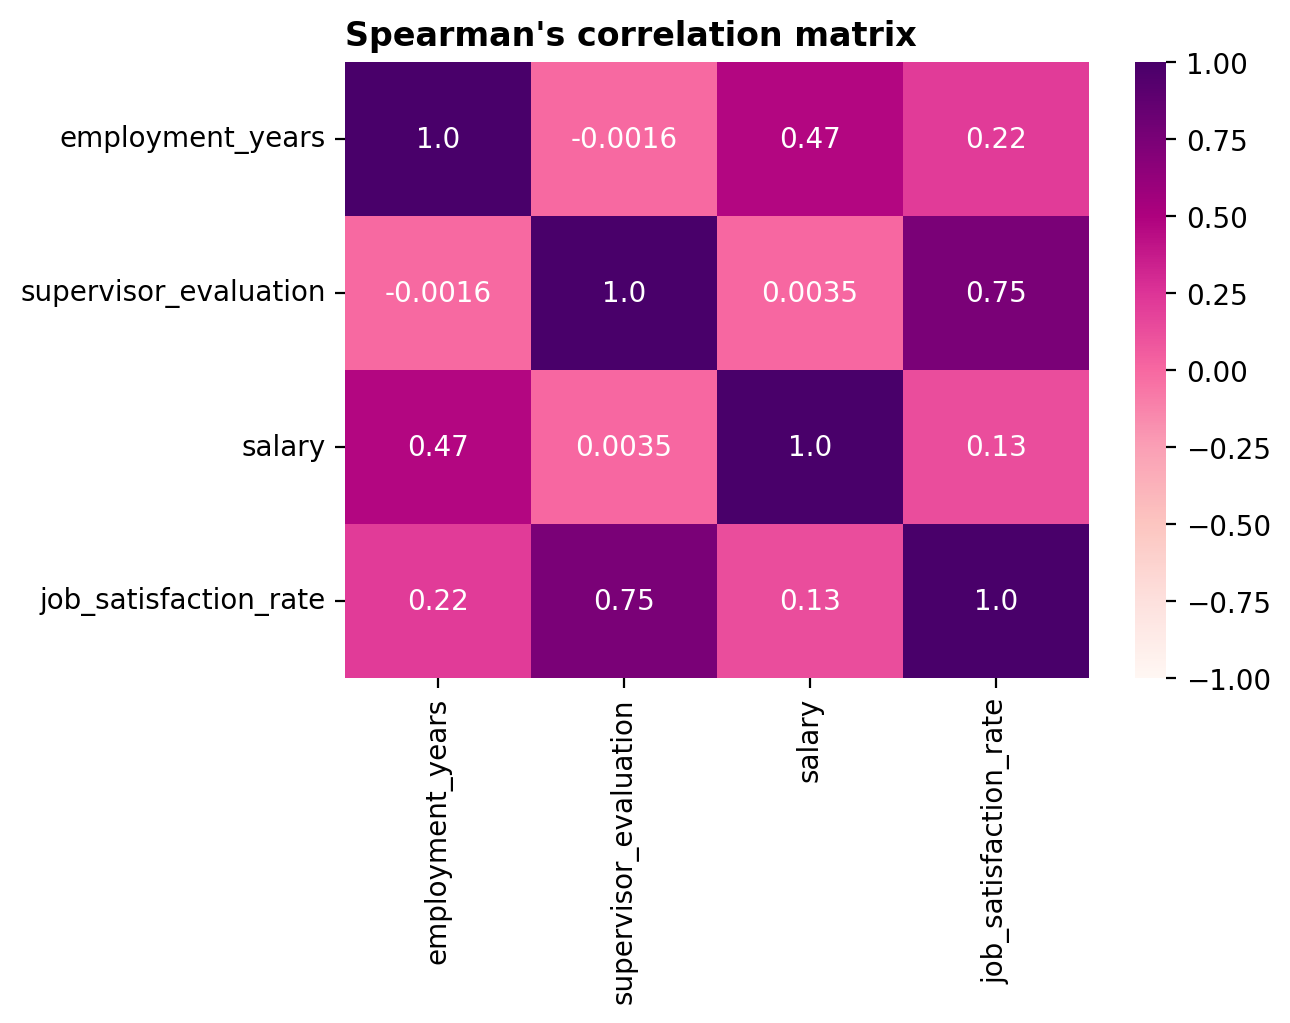

In [36]:
# Spearman's correlation matrix
corr = X_jsr.corr(method='spearman', numeric_only=True)

fig, ax = plt.subplots(figsize = (6,4))
ax.set_title("Spearman's correlation matrix",
             loc='left',
             fontweight='semibold')
ax = sns.heatmap(corr,
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values,
                 vmin=-1,
                 vmax=1,
                 cmap='RdPu',
                 annot=True,
                 fmt='.2')
plt.show()

There is a strong linear relationship between the target feature `job_satisfaction_rate` and the input feature `supervisor_evaluation`. No multicollinearity among the input features is detected. The presence of a strong linear relationship between the input and target features allows us to consider linear regression as one of the options for solving the task.

Let's look at the phi-coefficient matrix. It will indicate whether there are nonlinear dependencies between the parameters and also show the relationship between the target feature and categorical input features.

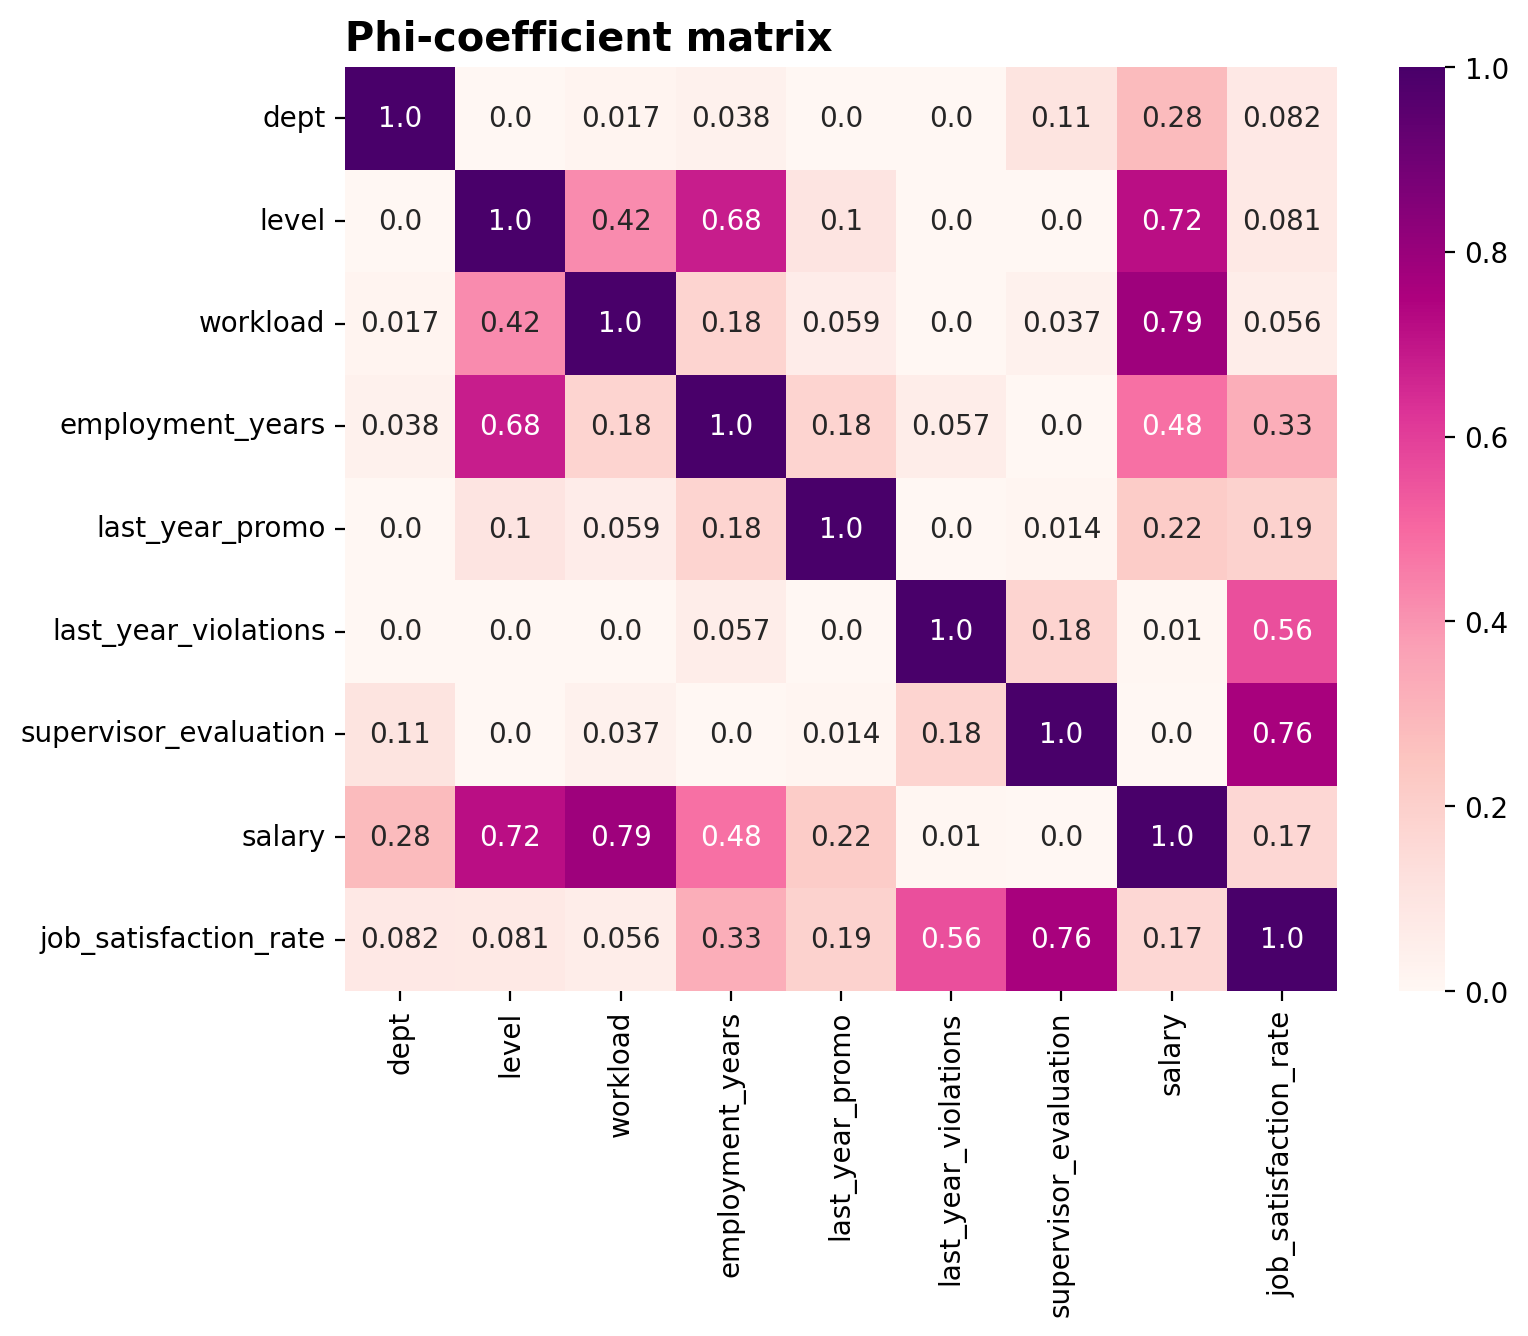

In [37]:
# phi-coefficient matrix
corr = X_jsr.phik_matrix(interval_cols=['job_satisfaction_rate','salary'])

fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Phi-coefficient matrix',
             loc='left',
             fontsize='x-large',
             fontweight='semibold')
ax = sns.heatmap(corr,
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values,
                 vmin=0,
                 vmax=1,
                 cmap='RdPu',
                 annot=True,
                 fmt='.2')
plt.show()

The phi-coefficient matrix revealed a strong correlation between the categorical features `level` and `workload`, as well as the quantitative feature `salary`, and between `level` and `employment_years`.

####  Correlation analysis of X_quit dataset

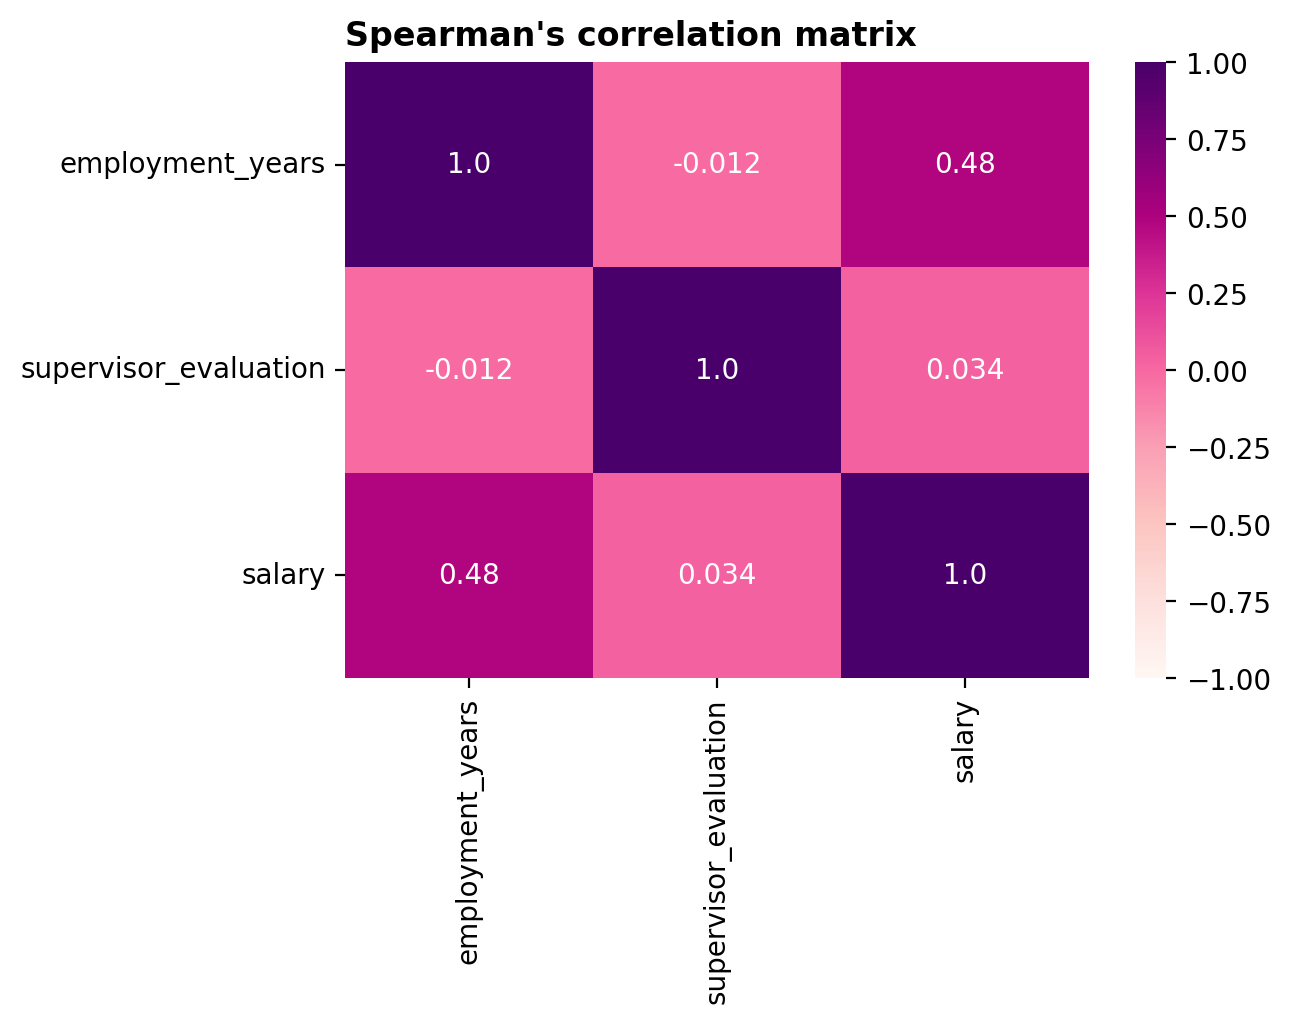

In [38]:
# Spearman's correlation matrix
corr = X_quit.corr(method='spearman', numeric_only=True)

fig, ax = plt.subplots(figsize = (6,4))
ax.set_title("Spearman's correlation matrix",
             loc='left',
             fontweight='semibold')
ax = sns.heatmap(corr,
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values,
                 vmin=-1,
                 vmax=1,
                 cmap='RdPu',
                 annot=True,
                 fmt='.2')
plt.show()

No significant linear relationships between the target feature `quit` and the input features were found.

Let's look at the phi-coefficient matrix. It will indicate whether there are nonlinear dependencies between the parameters and also show the relationship between the target feature and categorical input features.

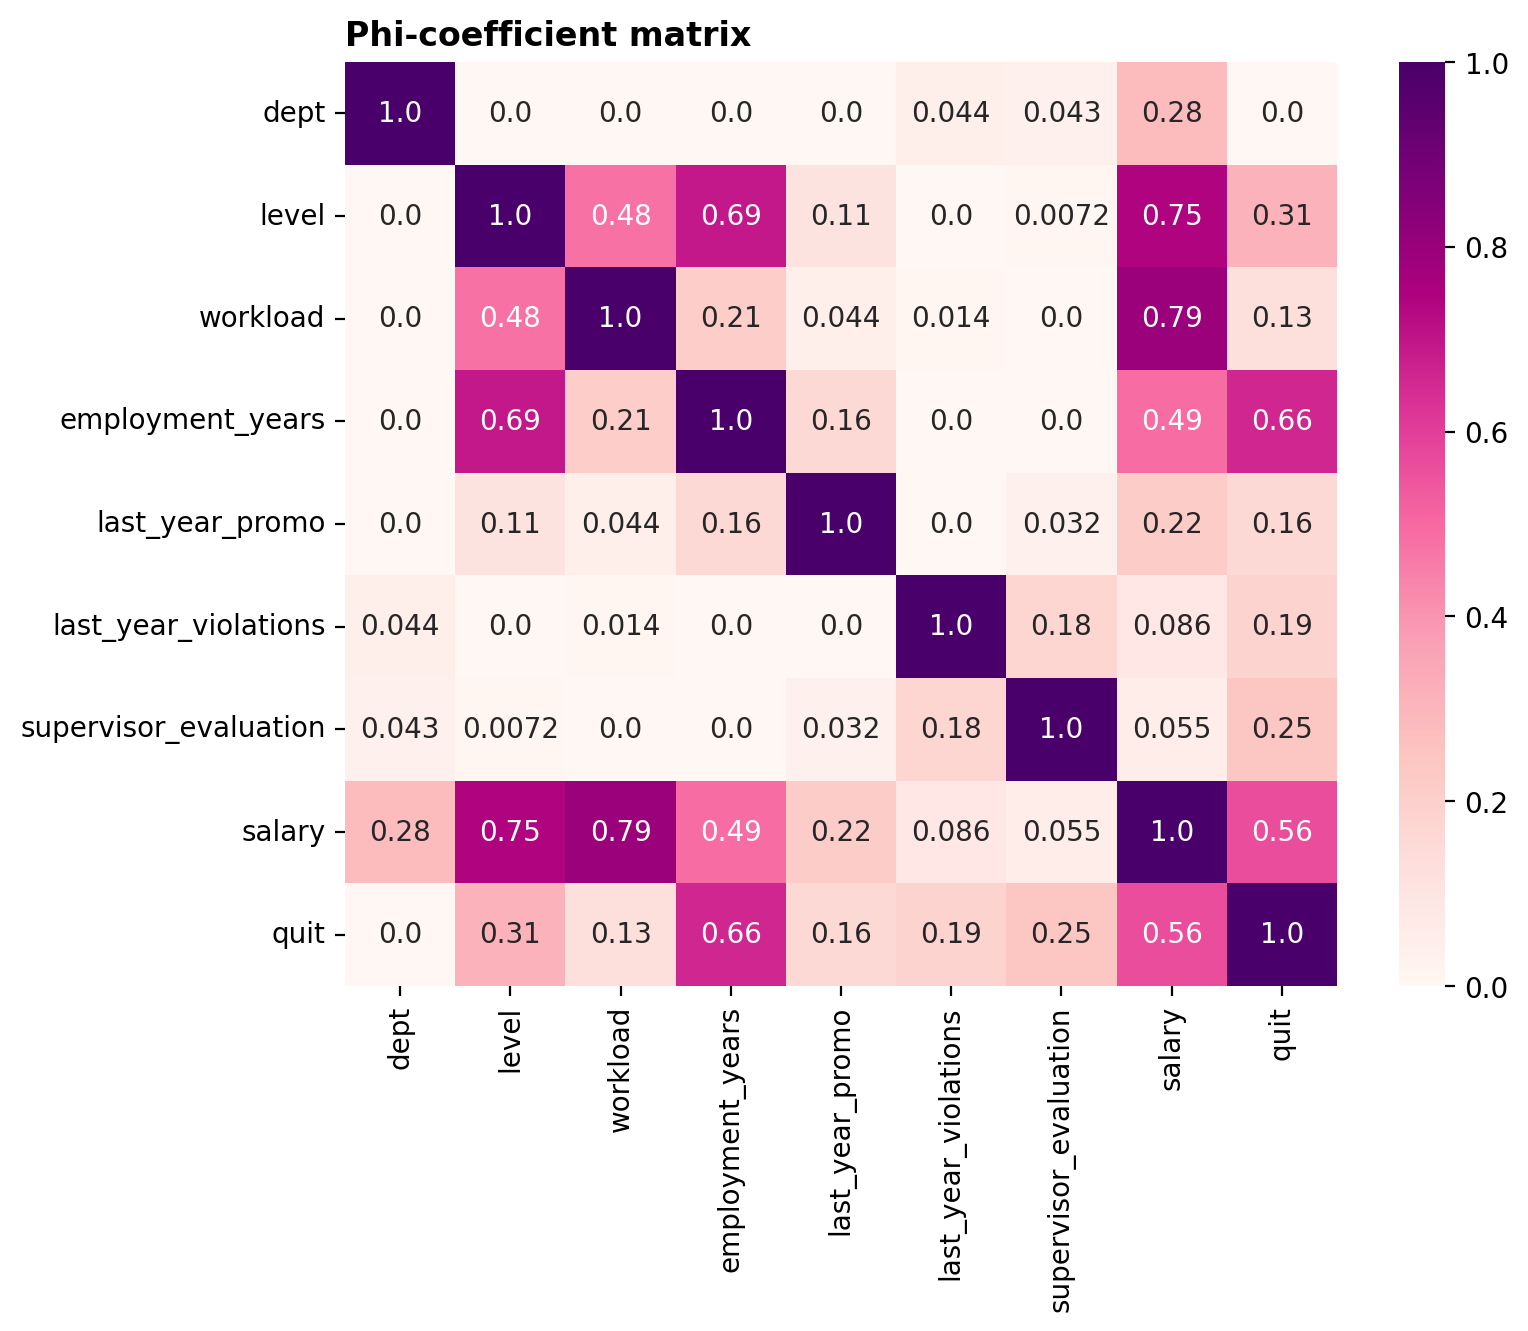

In [39]:
# phi-coefficient matrix
corr = X_quit.phik_matrix(interval_cols=['salary', 'supervisor_evaluation'])
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Phi-coefficient matrix',
             loc='left',
             fontweight='semibold')
ax = sns.heatmap(corr,
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values,
                 vmin=0,
                 vmax=1,
                 cmap='RdPu',
                 annot=True,
                 fmt='.2')
plt.show()

The phi-coefficient matrix revealed a significant relationship between the target feature `quit` and the numerical feature `employment_years`, and a noticeable connection with the `salary` feature. As in the previous dataset, connections with `level`, `workload`, and `salary` are evident.

## 4. Profile of a typical resigned employee

Let's count how many people quit the job.

In [40]:
# Create a subset with only resigned employees
data_quit = X_quit[X_quit['quit']=='yes'].drop('quit', axis=1)
print(f'Number of resigned employees: {data_quit.shape[0]} out of 4000',
      f'({round((data_quit.shape[0] / X_quit.shape[0] * 100),2)}%)')

Number of resigned employees: 1128 out of 4000 (28.2%)


Let's consider the proportion of resigned employees relative to the total number of employees in each department.

In [41]:
# Total employees by the department
data_pivot_all = X_quit.pivot_table(index='dept', values='salary', aggfunc='count')

# Resigned employees in each department
data_pivot_quit = data_quit.pivot_table(index='dept', values='salary', aggfunc='count')

# Combine the data
data_pivot_quit = data_pivot_quit.merge(data_pivot_all, on='dept', how='left')
data_pivot_quit.columns = ['quit', 'total']
data_pivot_quit['quit_%'] = round((data_pivot_quit['quit'] / data_pivot_quit['total']) * 100, 0)

display(data_pivot_quit)
print(f'On average, {data_pivot_quit["quit_%"].mean()/100:.0%} of the employees resigned.')

,quit,total,quit_%
dept,,,
hr,116,464,25.0
marketing,163,582,28.0
purchasing,166,588,28.0
sales,407,1438,28.0
technology,276,928,30.0


On average, 28% of the employees resigned.


There is no clear department that stands out as having the highest outflow rate. The Technology department has a slightly higher outflow rate of 30%, while HR is slightly below average at 25%.

Let's examine the distribution of resigned employees by job level.

In [42]:
# Total employees by level
data_pivot_all = X_quit.pivot_table(index='level', values='salary', aggfunc='count')

# Resigned employees of each level
data_pivot_quit = data_quit.pivot_table(index='level', values='salary', aggfunc='count')

# Combine the data
data_pivot_quit = data_pivot_quit.merge(data_pivot_all, on='level', how='left')
data_pivot_quit.columns = ['quit', 'total']
data_pivot_quit['quit_%'] = round((data_pivot_quit['quit'] / data_pivot_quit['total']) * 100, 0)

data_pivot_quit

,quit,total,quit_%
level,,,
junior,1003,1949,51.0
middle,108,1694,6.0
senior,17,357,5.0


Employees at the junior level are the most likely to resign, accounting for over half of all employees at this level. The situation with Middle and Senior specialists is quite optimistic, with only 5-6% of specialists at these levels resigning.

Let's consider the workload level.

In [43]:
# Total employees by workload
data_pivot_all = X_quit.pivot_table(index='workload', values='salary', aggfunc='count')

# Resigned employees of each level of workload
data_pivot_quit = data_quit.pivot_table(index='workload', values='salary', aggfunc='count')

# Combine the data
data_pivot_quit = data_pivot_quit.merge(data_pivot_all, on='workload', how='left')
data_pivot_quit.columns = ['quit', 'total']
data_pivot_quit['quit_%'] = round((data_pivot_quit['quit'] / data_pivot_quit['total']) * 100, 0)

data_pivot_quit

,quit,total,quit_%
workload,,,
high,121,674,18.0
low,519,1208,43.0
medium,488,2118,23.0


Employees with a low workload level are most likely to resign, it is 43% of all employees with this workload level.

Let's examine the employment years.

In [44]:
# Total employees by employment years
data_pivot_all = X_quit.pivot_table(index='employment_years', values='salary', aggfunc='count')

# Resigned employees by employment years
data_pivot_quit = data_quit.pivot_table(index='employment_years', values='salary', aggfunc='count')

# Combine the data
data_pivot_quit = data_pivot_quit.merge(data_pivot_all, on='employment_years', how='left')
data_pivot_quit.columns = ['quit', 'total']
data_pivot_quit['quit_%'] = round((data_pivot_quit['quit'] / data_pivot_quit['total']) * 100, 0)

data_pivot_quit

,quit,total,quit_%
employment_years,,,
1,599,985,61.0
2,290,777,37.0
3,163,479,34.0
4,27,393,7.0
5,23,362,6.0
6,10,296,3.0
7,7,308,2.0
8,3,174,2.0
9,3,136,2.0


Employees with 1 year of work experience are most likely to resign, accounting for 61% of cases. The longer an employee's work experience, the lower the probability of resignation.

Let's examine employees based on whether they received a promotion last year.

In [45]:
# Total employees
data_pivot_all = X_quit.pivot_table(index='last_year_promo', values='salary', aggfunc='count')

# Resigned employees
data_pivot_quit = data_quit.pivot_table(index='last_year_promo', values='salary', aggfunc='count')

# Combine the data
data_pivot_quit = data_pivot_quit.merge(data_pivot_all, on='last_year_promo', how='left')
data_pivot_quit.columns = ['quit', 'total']
data_pivot_quit['quit_%'] = round((data_pivot_quit['quit'] / data_pivot_quit['total']) * 100, 0)

data_pivot_quit

,quit,total,quit_%
last_year_promo,,,
no,1127,3887,29.0
yes,1,113,1.0


Employees very rarely resign after receiving a promotion. Among those who did not receive a promotion, 30% of employees resigned.

Let's consider violations of the employment contract.

In [46]:
# Total employees
data_pivot_all = X_quit.pivot_table(index='last_year_violations', values='salary', aggfunc='count')

# Resigned employees
data_pivot_quit = data_quit.pivot_table(index='last_year_violations', values='salary', aggfunc='count')

# Combine the data
data_pivot_quit = data_pivot_quit.merge(data_pivot_all, on='last_year_violations', how='left')
data_pivot_quit.columns = ['quit', 'total']
data_pivot_quit['quit_%'] = round((data_pivot_quit['quit'] / data_pivot_quit['total']) * 100, 0)

data_pivot_quit

,quit,total,quit_%
last_year_violations,,,
no,900,3455,26.0
yes,228,545,42.0


Employees who have violated the employment contract resigned in 42% of cases. We do not have data on whether this is initiated by the employee or the employer. The share of resigned employees without violations is 26%.

Finally, let's examine the salary.

In [47]:
# Median salary by department
data_pivot_all = X_quit.pivot_table(index='dept', values='salary', aggfunc='median')

# Median salary of resigned employees by department
data_pivot_quit = data_quit.pivot_table(index='dept', values='salary', aggfunc='median')

# Combine the data
data_pivot_quit = data_pivot_quit.merge(data_pivot_all, on='dept', how='left')
data_pivot_quit.columns = ['salary', 'median_salary']
data_pivot_quit['delta_%'] = round((data_pivot_quit['median_salary'] / data_pivot_quit['salary'] - 1) * 100, 0)


display(data_pivot_quit)
print(f'On average, the salary of resigned employees was {data_pivot_quit["delta_%"].mean()/100:.0%} lower '
      f'than median salary in their department.')

,salary,median_salary,delta_%
dept,,,
hr,22200,30000,35.0
marketing,24000,31200,30.0
purchasing,21600,28800,33.0
sales,20400,27600,35.0
technology,26400,33600,27.0


On average, the salary of resigned employees was 32% lower than median salary in their department.


### Summary

The typical resigned employee is a junior-level employee, regardless of the department, who has worked at the company for 1 year, with a low workload level, receiving a salary significantly below the departmental median. The presence of violations of the employment contract is most likely to lead to resignation. Promotion does not have a significant impact on the overall outflow trend.

## 5. Machine learning model for `job_satisfaction_rate` prediction

The problem at hand is a regression task, as we need to predict precise values for a quantitative continuous feature. To solve the regression problem, linear regression models and decision trees are used. We will select the model and hyperparameters for the best prediction of the target feature.

Since a separate test dataset is provided by the customer, we will use the entire dataset for training the models.

Before we start, we need to delete all the duplicates in the training dataset (even though two employees can have identical parameters) as they are not useful for modeling purposes.

In [48]:
# Remove duplicates
X_jsr = X_jsr.drop_duplicates(keep='first')

In [49]:
# Separate target and input features
y_jsr = X_jsr['job_satisfaction_rate']
X_jsr = X_jsr.drop(['job_satisfaction_rate'], axis=1)

print('Number of rows (employees) in training set:', X_jsr.shape[0])
print('Number of columns (features) in training set:', X_jsr.shape[1])

Number of rows (employees) in training set: 3755
Number of columns (features) in training set: 8


For model quality evaluation we will use custom metric - SMAPE (Symmetric Mean Absolute Percentage Error).

In [50]:
# Create custom metric
def smape_score(y_true, y_pred):
    smape = (100/len(y_true)) * np.sum(np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred)) / 2))
    return smape

smape = make_scorer(smape_score, greater_is_better=False)

In [51]:
# Create lists of features
ohe_columns = ['dept', 'last_year_promo','last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years','salary','supervisor_evaluation']

# Pipe for ohe_columns: SimpleImputer + One-Hot-Encoding
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# Pipe for ord_columns: SimpleImputer + Ordinal-Encoding
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# Assemble the preprocessor pipe
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Assemble the final pipeline
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

# Parameter grid
param_grid = [
    # DecisionTreeRegressor() parameters
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'model__max_depth': range(2, 20),
        'model__max_features': range(1, 6),
        'model__min_samples_split': range(2, 6),
        'model__min_samples_leaf': range(1, 5),
        'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # LinearRegression() parameters
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [52]:
# Start randomized search with cross-validation
random_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape,
    random_state=RANDOM_STATE,
    n_jobs = -1
)

random_search.fit(X_jsr, y_jsr)

# Use abs(SMAPE) as metric's parameter greater_is_better=False changes the sign
print('Best model and its hyperparameters:\n', random_search.best_estimator_['model'])
print ('\nSMAPE (cross-validation):', abs(random_search.best_score_).round(2))

Best model and its hyperparameters:
 DecisionTreeRegressor(criterion='absolute_error', max_depth=15, max_features=5,
                      min_samples_leaf=2, random_state=42)

SMAPE (cross-validation): 16.69


In [53]:
# Model testing
y_test_pred_jsr = random_search.predict(test_data.drop(['job_satisfaction_rate','quit'], axis=1))
print('SMAPE (test set):',
      abs(smape_score(test_data['job_satisfaction_rate'], y_test_pred_jsr)).round(2))

SMAPE (test set): 14.54


### Summary

To find the best model, we conducted a randomized search among 2 models: linear regression and decision tree. During cross-validation, the model with the lowest SMAPE metric turned out to be the decision tree model with the following parameters:

`DecisionTreeRegressor(criterion='absolute_error', max_depth=15, max_features=5, min_samples_leaf=2, random_state=42)`

During correlation analysis we saw only one input parameter with a linear relationship with the target feature `job_satisfaction_rate`, that's why Decision Tree unsurprisingly has better results.

The SMAPE metric on the test dataset provided by the customer is 14.54, meeting the model's success criterion of SMAPE less than or equal to 15.

## 6. Hypothesis testing on the relationship between `job_satisfaction_rate` and `quit`

Let's formulate the null and alternative hypotheses.

**H<sub>0</sub>**: The mean value of the `job_satisfaction_rate` feature for resigned employees is **equal** to the mean value of the `job_satisfaction_rate` feature for working employees.

**H<sub>a</sub>**: The mean value of the `job_satisfaction_rate` feature for resigned employees is **not equal** to the mean value of the `job_satisfaction_rate` feature for working employees.

In [54]:
# Create subsets separated by the `quit` feature
quit_yes = test_data[test_data['quit']=='yes']
quit_no = test_data[test_data['quit']=='no']

# Print the mean values
print('Mean job_satisfaction_rate (resigned employees):', quit_yes['job_satisfaction_rate'].mean().round(2))
print('Mean job_satisfaction_rate (working employees):', quit_no['job_satisfaction_rate'].mean().round(2))

Mean job_satisfaction_rate (resigned employees): 0.39
Mean job_satisfaction_rate (working employees): 0.61


Even without statistical test, we can see the difference between the means of the two samples but we will conduct the test anyway. We will use a t-test for two independent samples to test the two-sided hypothesis.

We use a t-test for two independent samples to test the two-sided hypothesis. We will set the parameter `equal_var=False` as we don't have prior knowledge about the equality of variances.

In [55]:
# Set the level of statistical significance
alpha = 0.05

# Test the hypothesis
results = st.ttest_ind(quit_yes['job_satisfaction_rate'], quit_no['job_satisfaction_rate'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 2.7708628031543735e-101
Reject the null hypothesis


Let's visualize the distributions for both samples.

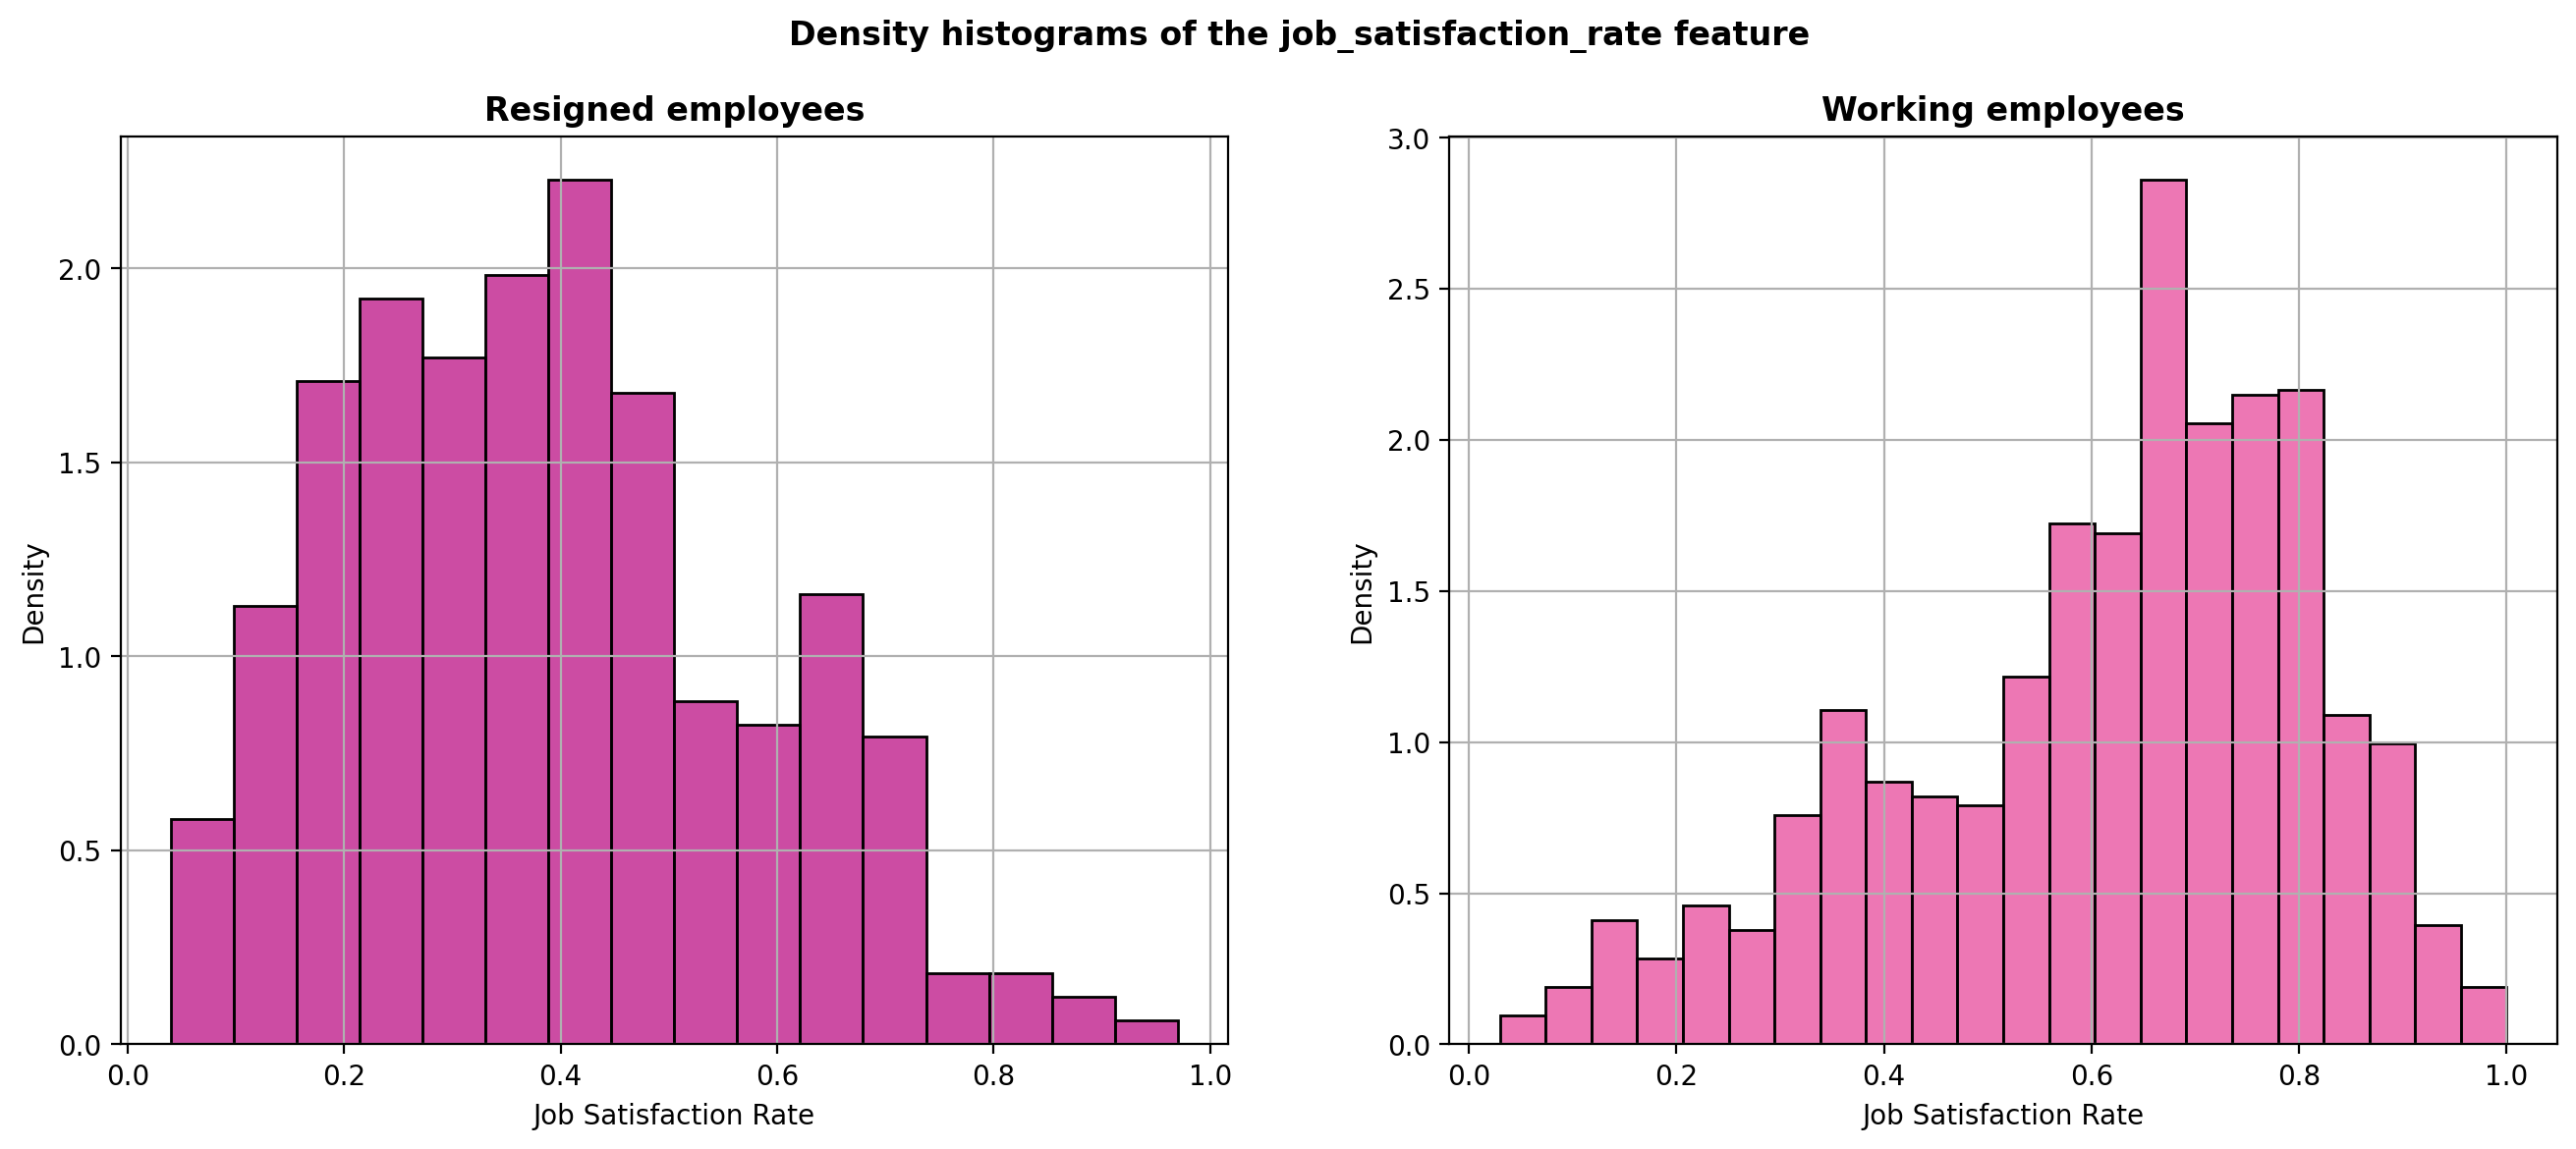

,X_jsr,X_quit
count,564.00,1436.00
mean,0.39,0.61
std,0.19,0.20
min,0.04,0.03
25%,0.24,0.50
50%,0.37,0.66
75%,0.49,0.76
max,0.97,1.00


In [56]:
# Histogram and descriptove statistics
draw_norm_histogram_describe(data=[quit_yes,quit_no],
                             column='job_satisfaction_rate',
                             xlabel='Job Satisfaction Rate',
                             title='Density histograms of the job_satisfaction_rate feature',
                             title1='Resigned employees',
                             title2='Working employees')

### Summary

We reject the null hypothesis of equality of the mean `job_satisfaction_rate` between resigned and working employees in favor of the alternative hypothesis — they have a statistically significant difference.

To predict employee outflow, we will add the `job_satisfaction_rate` feature to the training dataset.

## 7. Machine learning model for `quit` prediction

The problem at hand is a binary classification task, as we need to assign an employee to one of two categories — will resign or will not resign. We will select the model and hyperparameters for the best prediction of the target feature. The target quality metric is ROC-AUC not less than 0.91 on the test dataset.

Based on the results of testing the hypothesis regarding the influence of `job_satisfaction_rate` on the probability of resignation, we have decided to add a new input feature to the dataset. To do this, we will apply a model for predicting `job_satisfaction_rate` to the `X_quit` dataset.

In [57]:
# Add new feature job_satisfaction_rate
X_quit['job_satisfaction_rate'] = random_search.predict(X_quit)
X_test['job_satisfaction_rate'] = random_search.predict(X_test)

Before we start, we need to delete all the duplicates in the training dataset (even though two employees can have identical parameters) as they are not useful for modeling purposes.

In [58]:
# Remove duplicates
X_quit = X_quit.drop_duplicates(keep='first')

Since a separate test dataset is provided by the customer, we will use the entire dataset for training the models.

In [59]:
# Separate target and input features
y_quit = X_quit['quit']
X_quit = X_quit.drop('quit', axis=1)

print('Number of rows (employees) in training set:', X_quit.shape[0])
print('Number of columns (features) in training set:', X_quit.shape[1])

Number of rows (employees) in training set: 2587
Number of columns (features) in training set: 9


In [60]:
# Encode the target feature
label_encoder = LabelEncoder()
label_encoder.fit_transform(y_quit)
label_encoder.transform(y_test_quit['quit'])
print(label_encoder.classes_)

['no' 'yes']


We can reuse the data preprocessing and modeling steps from the previously created pipeline. The only difference will be in the list of numerical values passed; we will add the new feature `job_satisfaction_rate` to it. We will also add feature selection step in the pipeline based on KBest algorithm.

In [61]:
# Update the list of numerical features
num_columns = ['employment_years','salary','supervisor_evaluation','job_satisfaction_rate']

# Assemble the final pipeline
pipe_final_2 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('feature_selection', SelectKBest()),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# Parameter grid
param_grid_2 = [
    # DecisionTreeClassifier() parameters
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(2, 12),
        'model__max_features': range(1, 11),
        'model__min_samples_split': range(2, 11),
        'model__min_samples_leaf': range(1, 11),
        'feature_selection__k': range(2,10)
    },
    
    # KNeighborsClassifier() parameters
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [5, 10, 50],
        'feature_selection__k': range(2,10)
    },

    # LogisticRegression() parameters
    {
        'model': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear'
        )],
        'model__C': [0.1, 1, 10],
        'feature_selection__k': range(2,10)
    },

    # Support Vector Machine() parameters
    {
        'model': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'model__degree': [2, 3, 4],
        'model__C': [0.1, 1, 10],
        'feature_selection__k': range(2,10)
    }
]

# Start randomized search and cross-validation
start = time.time()

random_search_2 = RandomizedSearchCV(
    pipe_final_2, 
    param_grid_2, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

random_search_2.fit(X_quit, y_quit)

search_time = time.time() - start

print('The search took:', round(search_time,2),'seconds.')

print('Best model and its hyperparameters:\n',
      random_search_2.best_estimator_['feature_selection'],'\n',
      random_search_2.best_estimator_['model'])
print ('ROC-AUC (cross-validation):', (random_search_2.best_score_).round(4))

The search took: 0.2 seconds.
Best model and its hyperparameters:
 SelectKBest(k=6) 
 DecisionTreeClassifier(max_depth=7, max_features=7, min_samples_leaf=6,
                       min_samples_split=7, random_state=42)
ROC-AUC (cross-validation): 0.8907


In [62]:
# Model testing
y_test_pred_quit = random_search_2.predict_proba(test_data.drop(['quit'], axis=1))
print('ROC-AUC (test set):', (roc_auc_score(test_data['quit'], y_test_pred_quit[:,1])).round(4))

ROC-AUC (test set): 0.9243


The KBest algorithm chose 6 the most important features. Let's look at them.

In [63]:
# Feature importance
data_preprocessor.fit_transform(X_quit)
pd.DataFrame({'Feature': data_preprocessor.get_feature_names_out(),
              'Selected': random_search_2.best_estimator_['feature_selection'].get_support()})

,Feature,Selected
0,ohe__dept_marketing,False
1,ohe__dept_purchasing,False
2,ohe__dept_sales,False
3,ohe__dept_technology,False
4,ohe__last_year_promo_yes,False
5,ohe__last_year_violations_yes,False
6,ord__level,True
7,ord__workload,True
8,num__employment_years,True
9,num__salary,True


### Summary

To find the best model, we conducted a randomized search among 4 models: linear regression, decision tree, support vector machine, and k-nearest neighbors. During cross-validation, the model with the highest ROC-AUC metric turned out to be the decision tree model with the following parameters:

1. Model: `DecisionTreeClassifier(max_depth=7, max_features=7, min_samples_leaf=6, min_samples_split=7, random_state=42)`
2. Features selected by KBest:
    * `job_satisfaction_rate`
    * `salary`
    * `employment_years`
    * `supervisor_evaluation`
    * `level`
    * `workload`

## 8. Research conclusion

In this research, we worked with company employee data to build machine learning models to solve two tasks:
1. Predicting the job satisfaction rate.
2. Predicting employee outflow.

The provided datasets contained high-quality data. Missing values accounted for less than 1% and were automatically handled in the pipeline. No other data issues were detected.

We thoroughly examined all features during the exploratory data analysis, conducted correlation analysis, and identified which features were most typical for employees who left the company.

**Profile of a typical resigned employee:** a junior-level employee, regardless of the department, who has worked at the company for 1 year, with a low workload level, receiving a salary significantly below the departmental median. The presence of violations of the employment contract is most likely to lead to resignation. Promotion does not have a significant impact on the overall outflow trend.

Next, we proceeded to solve the regression task - predicting the job satisfaction rate of employees. The best predictive model has the following parameters:
`DecisionTreeRegressor(criterion='absolute_error', max_depth=15, max_features=5, min_samples_leaf=2, random_state=42)`

The SMAPE metric on the test set was 14.54 with the success criterion of SMAPE less than or equal to 15.

We tested the hypothesis regarding the relationship between job satisfaction rate and outflow. The presence of such a connection was confirmed, so the `job_satisfaction_rate` feature was added to the test set for predicting employee outflow.

Next, we solved the binary classification task - predicting whether an employee will leave the company. The best predictive model has the following parameters:

`DecisionTreeClassifier(max_depth=7, max_features=7, min_samples_leaf=6, min_samples_split=7, random_state=42)`

It was trained on a dataset with 6 most important features (`job_satisfaction_rate`, `salary`, `employment_years`, `supervisor_evaluation`, `level`, `workload`) selected by KBest algorithm. The ROC-AUC metric on the test set was 0.92 with the success criterion of ROC-AUC no less than 0.91.

Future model quality improvement suggestions: we recommend evaluating satisfaction at least 2-3 times a year and including the job satisfaction rate feature in datasets for further model training to predict employee outflow.

Recommendations for reducing employee outflow:
* Pay more attention to junior-level employees in their first year of employment. The outflow rate in this category is 61%.
* Redistribute workload more evenly. Data suggests that employees with low workload leave more frequently than other categories, indicating they lack tasks to realize their professional potential.
* Perform salary indexation for employees whose salary is 30% or more below the median.
* Supervisor evaluation significantly influences outflow. It is recommended to expand the range of possible values (for example, 4.25, 4.5, 4.75). This way, an employee who falls just short of a perfect score will not be demotivated by a 4 rating. Providing feedback properly is also a significant factor.
* Apply recommendations regardless of the department, as data shows that the department does not affect the outflow rate.